In [1]:
#Import library and packages:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

# Data Understanding and Cleaning

In [2]:
#Load data and check its basic information
df = pd.read_csv('JPM covid19.csv')
display(df.info(), df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PERMNO   505 non-null    int64  
 1   date     505 non-null    object 
 2   TICKER   505 non-null    object 
 3   COMNAM   505 non-null    object 
 4   BIDLO    505 non-null    float64
 5   ASKHI    505 non-null    float64
 6   PRC      505 non-null    float64
 7   VOL      505 non-null    int64  
 8   RET      505 non-null    float64
 9   BID      505 non-null    float64
 10  ASK      505 non-null    float64
 11  OPENPRC  505 non-null    float64
 12  vwretd   505 non-null    float64
 13  vwretx   505 non-null    float64
 14  ewretd   505 non-null    float64
 15  ewretx   505 non-null    float64
 16  sprtrn   505 non-null    float64
dtypes: float64(12), int64(2), object(3)
memory usage: 67.2+ KB


None

PERMNO        date TICKER               COMNAM    BIDLO   ASKHI     PRC  \
0   47896  2019-01-02    JPM  JPMORGAN CHASE & CO  95.9400   99.78   99.31   
1   47896  2019-01-03    JPM  JPMORGAN CHASE & CO  96.6900   98.89   97.11   
2   47896  2019-01-04    JPM  JPMORGAN CHASE & CO  98.2800  100.93  100.69   
3   47896  2019-01-07    JPM  JPMORGAN CHASE & CO  99.7103  101.47  100.76   
4   47896  2019-01-08    JPM  JPMORGAN CHASE & CO  99.5450  101.82  100.57   

        VOL       RET     BID     ASK  OPENPRC    vwretd    vwretx    ewretd  \
0  15670850  0.017312   99.32   99.33    95.95  0.001796  0.001791  0.017126   
1  16286426 -0.014097   97.06   97.08    98.64 -0.021043 -0.021229 -0.009454   
2  16935205  0.036865  100.66  100.67    99.11  0.033410  0.033409  0.030804   
3  15430712  0.000695  100.76  100.77   100.43  0.009202  0.009196  0.016144   
4  13578777 -0.001886  100.57  100.58   101.63  0.010269  0.010248  0.010358   

     ewretx    sprtrn  
0  0.017105  0.001269  
1 -0.009493 -0.024757  
2  0.030780  0.034336  
3  0.016133  0.007010  
4  0.010339  0.009695

In [3]:
df['PERMNO'] = df['PERMNO'].apply(str)

In [4]:
df.isnull().sum()

PERMNO     0
date       0
TICKER     0
COMNAM     0
BIDLO      0
ASKHI      0
PRC        0
VOL        0
RET        0
BID        0
ASK        0
OPENPRC    0
vwretd     0
vwretx     0
ewretd     0
ewretx     0
sprtrn     0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.sort_values('date')
df

PERMNO TICKER               COMNAM     BIDLO     ASKHI     PRC  \
date                                                                        
2019-01-02  47896    JPM  JPMORGAN CHASE & CO   95.9400   99.7800   99.31   
2019-01-03  47896    JPM  JPMORGAN CHASE & CO   96.6900   98.8900   97.11   
2019-01-04  47896    JPM  JPMORGAN CHASE & CO   98.2800  100.9300  100.69   
2019-01-07  47896    JPM  JPMORGAN CHASE & CO   99.7103  101.4700  100.76   
2019-01-08  47896    JPM  JPMORGAN CHASE & CO   99.5450  101.8200  100.57   
...           ...    ...                  ...       ...       ...     ...   
2020-12-24  47896    JPM  JPMORGAN CHASE & CO  123.5700  125.5500  124.52   
2020-12-28  47896    JPM  JPMORGAN CHASE & CO  124.7886  126.6500  125.34   
2020-12-29  47896    JPM  JPMORGAN CHASE & CO  124.8900  126.2799  125.01   
2020-12-30  47896    JPM  JPMORGAN CHASE & CO  124.9000  125.8450  125.36   
2020-12-31  47896    JPM  JPMORGAN CHASE & CO  124.8200  127.3300  127.07   

                 VOL       RET     BID     ASK  OPENPRC    vwretd    vwretx  \
date                                                                          
2019-01-02  15670850  0.017312   99.32   99.33    95.95  0.001796  0.001791   
2019-01-03  16286426 -0.014097   97.06   97.08    98.64 -0.021043 -0.021229   
2019-01-04  16935205  0.036865  100.66  100.67    99.11  0.033410  0.033409   
2019-01-07  15430712  0.000695  100.76  100.77   100.43  0.009202  0.009196   
2019-01-08  13578777 -0.001886  100.57  100.58   101.63  0.010269  0.010248   
...              ...       ...     ...     ...      ...       ...       ...   
2020-12-24   4164948 -0.004398  124.56  124.61   125.09  0.002330  0.002195   
2020-12-28   8072641  0.006585  125.35  125.37   125.82  0.003847  0.003836   
2020-12-29   8389199 -0.002633  125.01  125.02   126.20 -0.003652 -0.003660   
2020-12-30   7397964  0.002800  125.40  125.41   125.49  0.003291  0.003124   
2020-12-31   8580214  0.013641  126.96  126.97   125.09  0.003558  0.003499   

              ewretd    ewretx    sprtrn  
date                                      
2019-01-02  0.017126  0.017105  0.001269  
2019-01-03 -0.009454 -0.009493 -0.024757  
2019-01-04  0.030804  0.030780  0.034336  
2019-01-07  0.016144  0.016133  0.007010  
2019-01-08  0.010358  0.010339  0.009695  
...              ...       ...       ...  
2020-12-24 -0.000277 -0.000458  0.003537  
2020-12-28  0.001350  0.001304  0.008723  
2020-12-29 -0.008483 -0.008656 -0.002227  
2020-12-30  0.010155  0.009754  0.001342  
2020-12-31 -0.001058 -0.001129  0.006439  

[505 rows x 16 columns]

# EDA

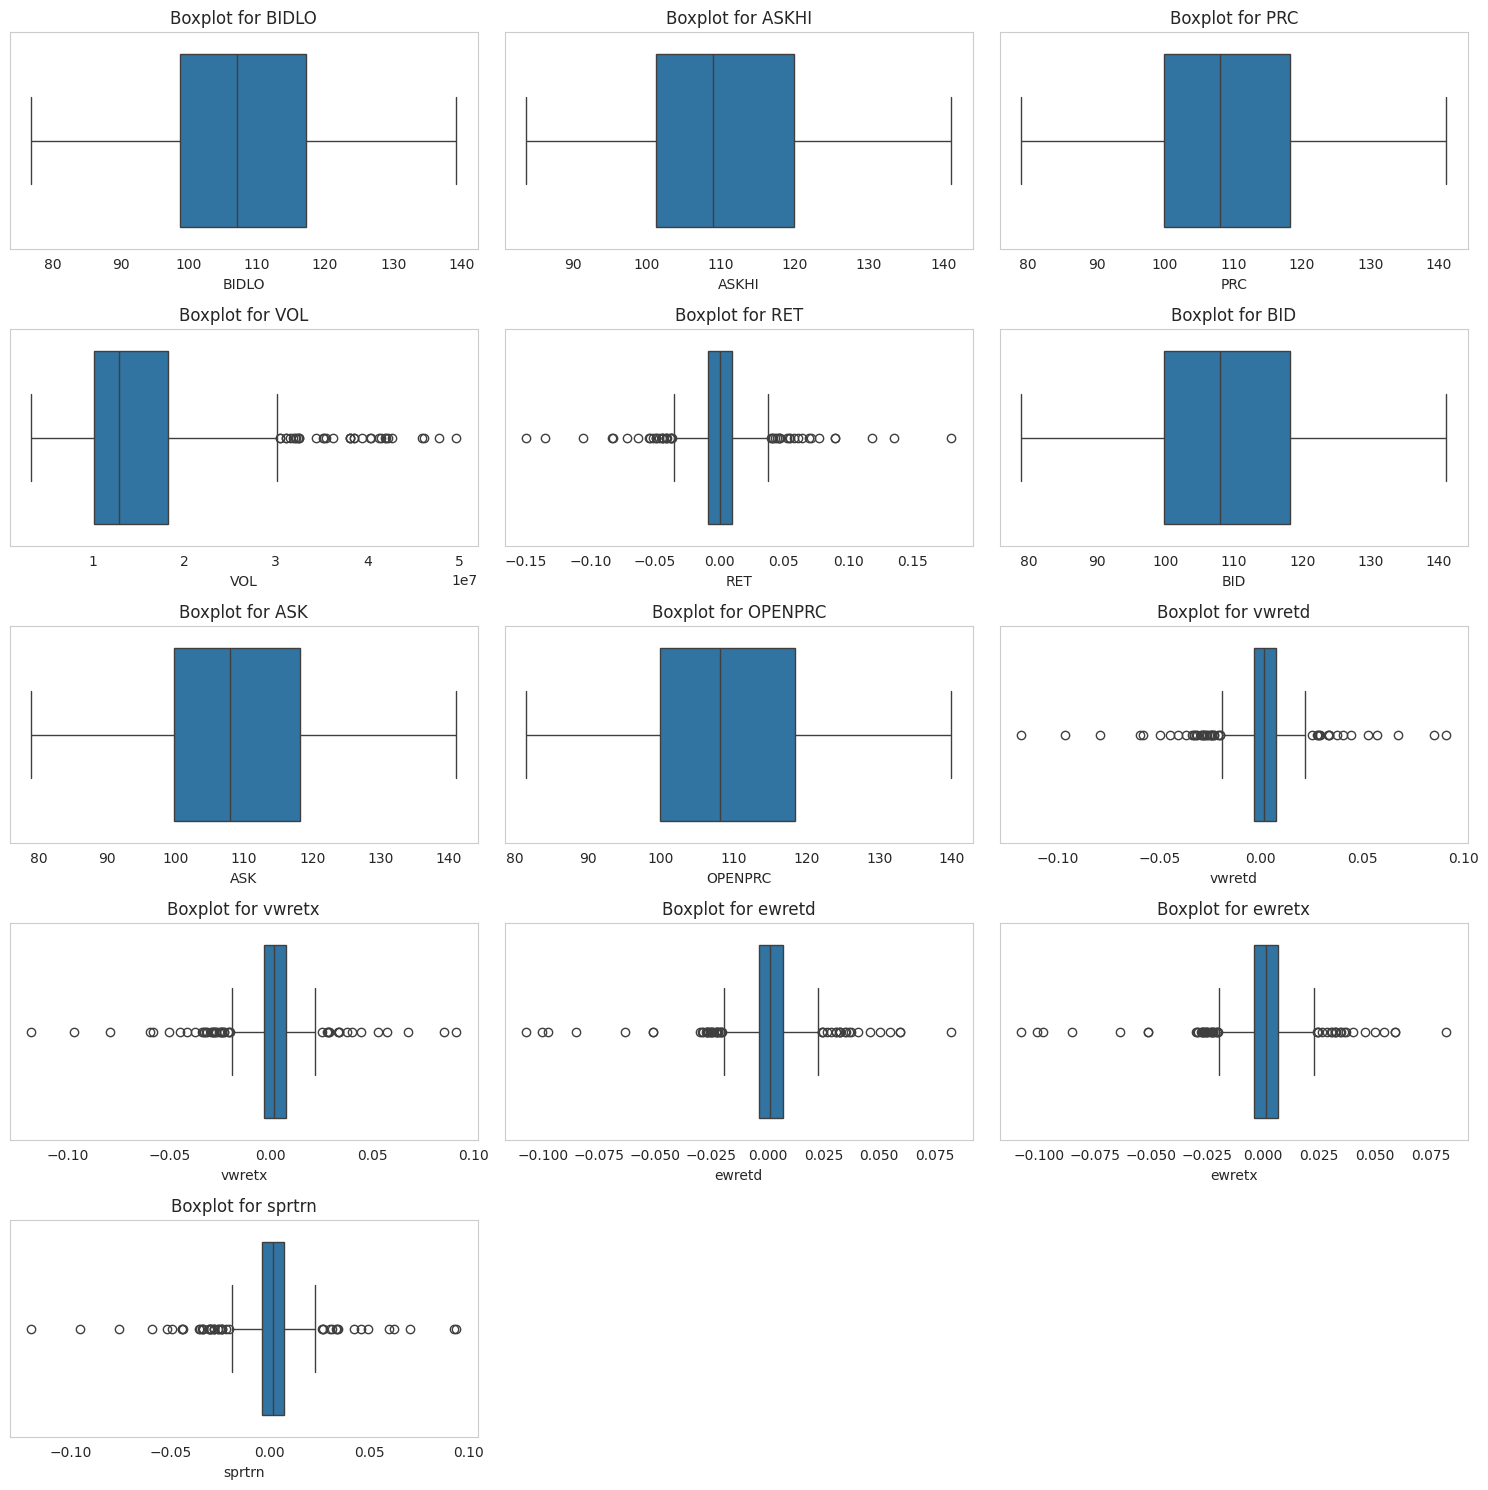

In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 15))

# Iterate through each numerical variable and plot a boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  # 2 rows, 4 columns
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

For the features such as trading volume (VOL), return (RET), value-weighted returns (vwretd, vwretx), equal-weighted returns (ewretd), and S&P Composite Index return (sprtrn), there are ouliters that we need to pay attention to.If we check their validity further, we can figure out that,

*   VOL represents the trading volume. The outliers might indicate days of unusually high trading activity.
*   RET represents the return. Outliers might indicate extreme market conditions.
*   value-weighted returns (vwretd, vwretx), equal-weighted returns (ewretd), and S&P Composite Index return (sprtrn) represents the value-weighted return, and the outliers might indicate extreme market conditions.


That's to say, the above abnormal values are consistent with the actual situation.

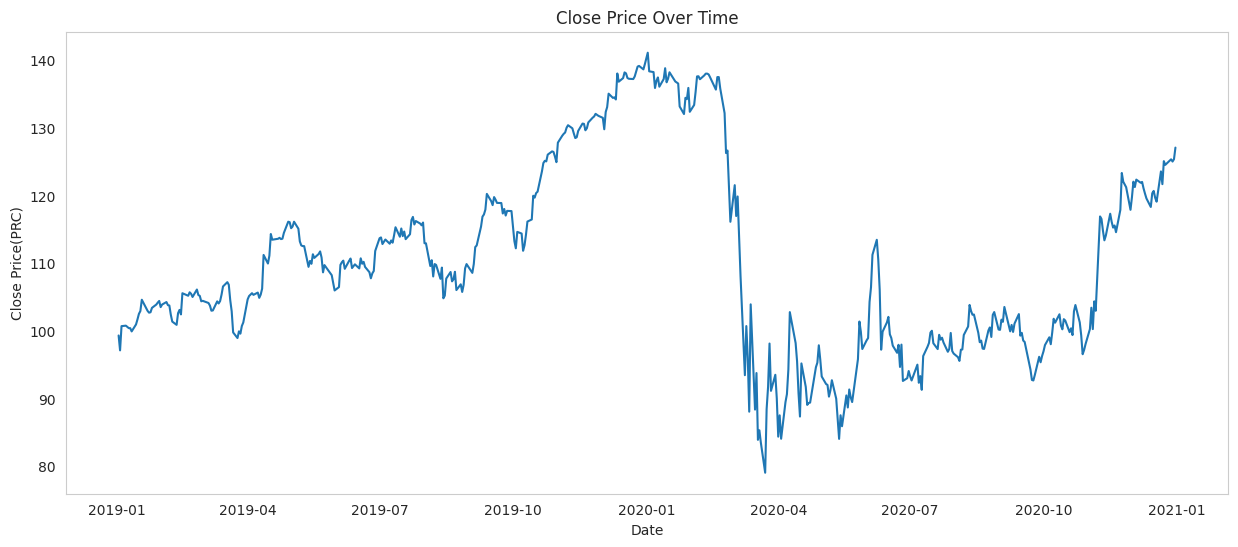

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['PRC'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price(PRC)')
plt.show()

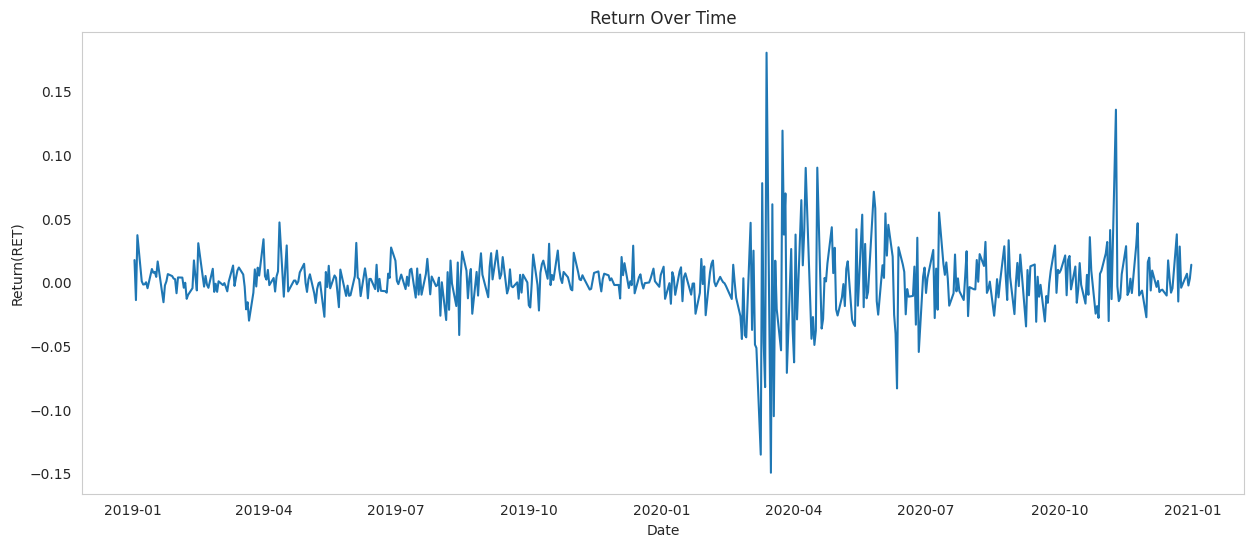

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['RET'])
plt.title('Return Over Time')
plt.xlabel('Date')
plt.ylabel('Return(RET)')
plt.show()

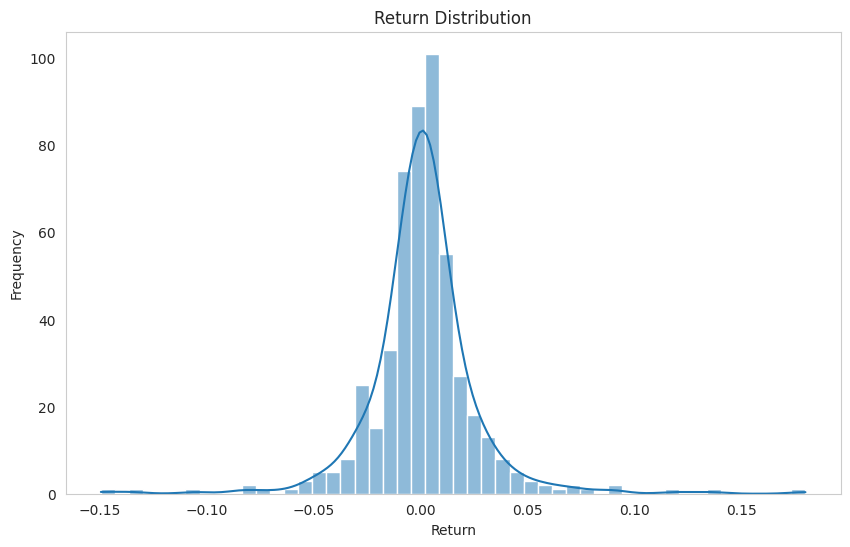

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RET'], bins=50, kde=True)
plt.title('Return Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

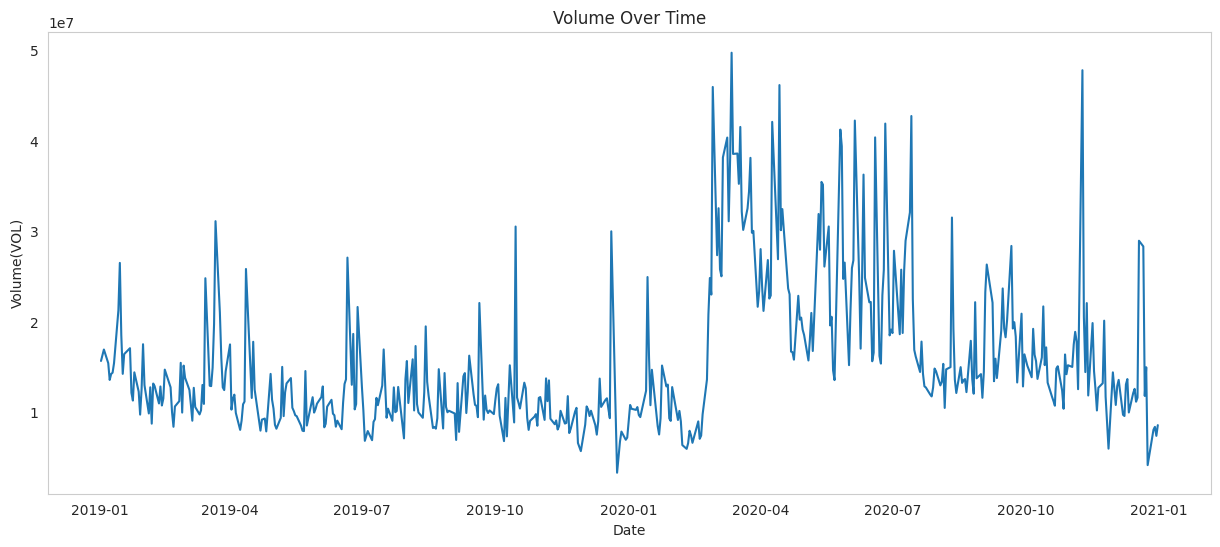

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['VOL'])
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume(VOL)')
plt.show()


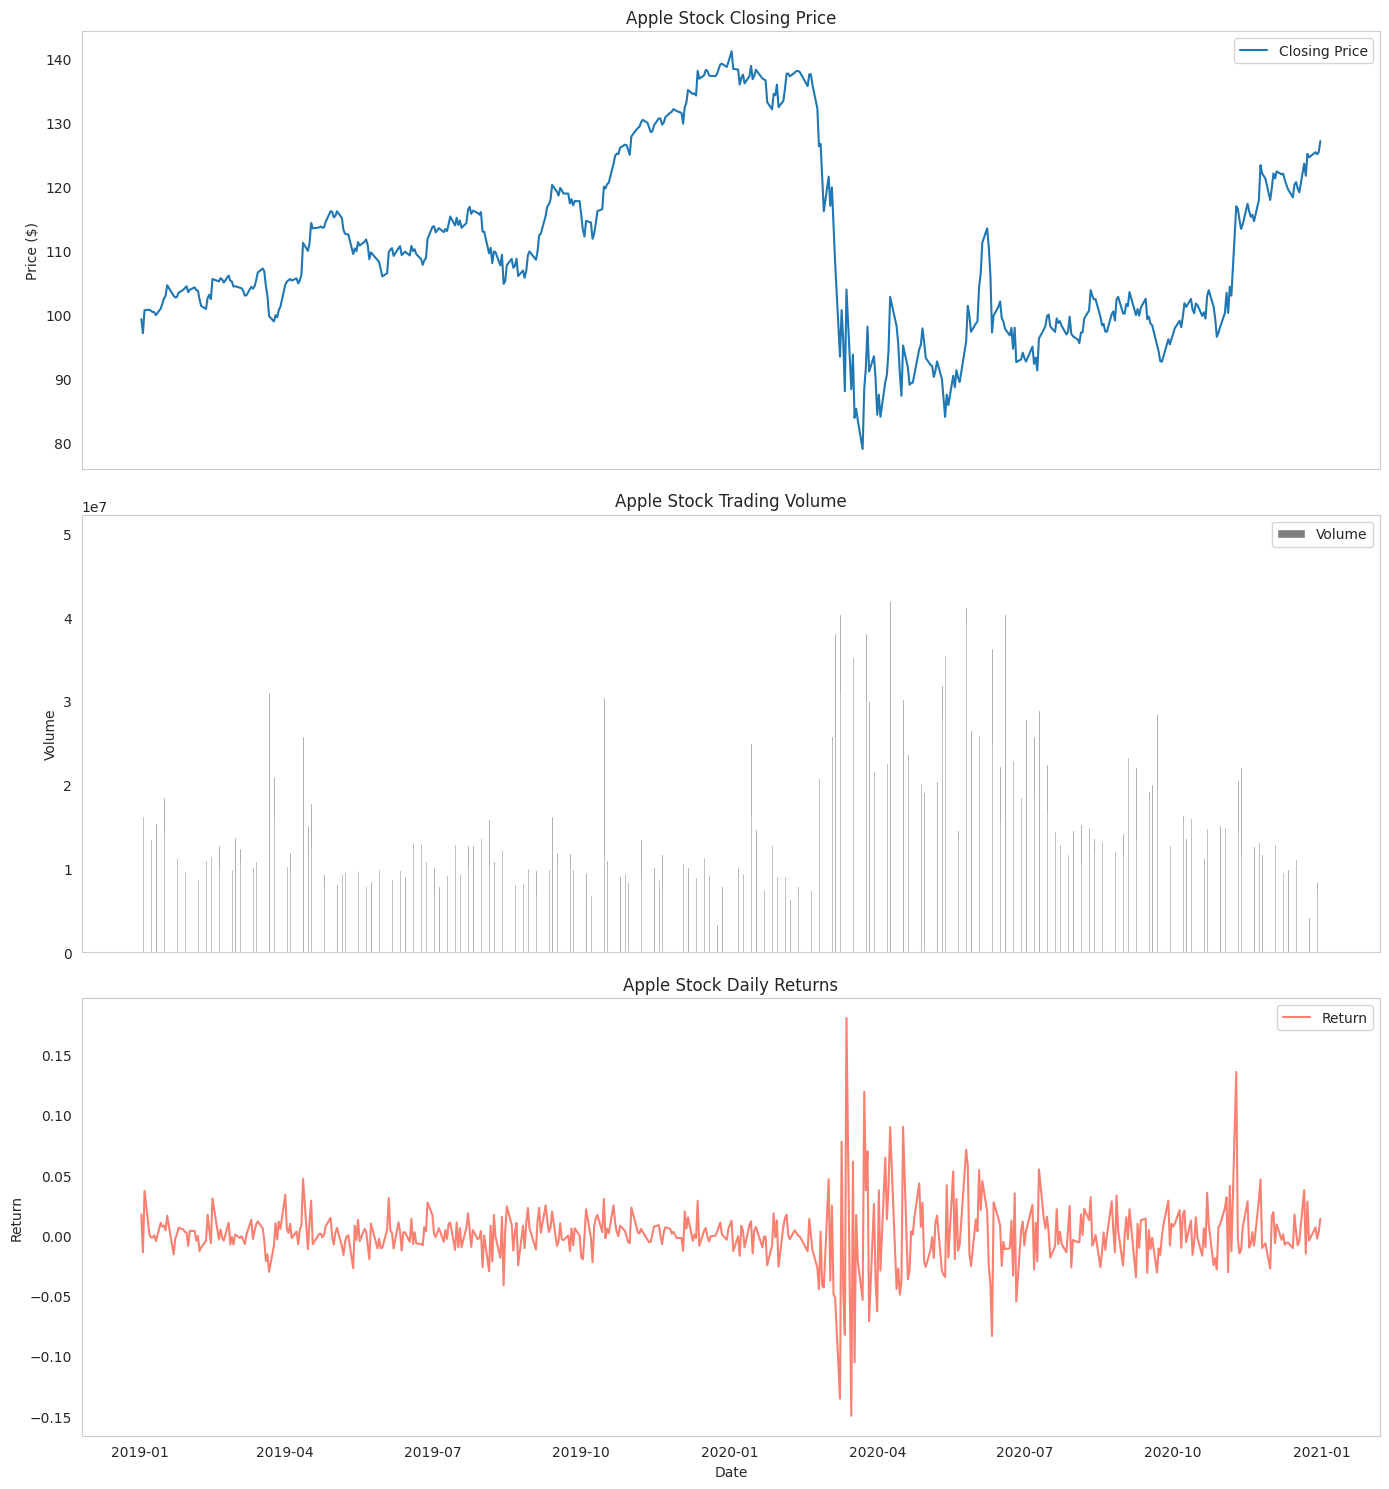

In [11]:
# Create a combined plot with three subplots on one figure, sharing the same x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Plot Closing Price on the first subplot
ax1.plot(df.index, df['PRC'], label='Closing Price')
ax1.set_title('Apple Stock Closing Price')
ax1.set_ylabel('Price ($)')
ax1.legend()

# Plot Volume on the second subplot
ax2.bar(df.index, df['VOL'], label='Volume', color='grey')
ax2.set_title('Apple Stock Trading Volume')
ax2.set_ylabel('Volume')
ax2.legend()

# Plot Returns on the third subplot
ax3.plot(df.index, df['RET'], label='Return', color='salmon')
ax3.set_title('Apple Stock Daily Returns')
ax3.set_ylabel('Return')
ax3.set_xlabel('Date')
ax3.legend()

# Improve layout and show plot
plt.tight_layout()
plt.show()


In [12]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.5 MB/s eta 0:00:00


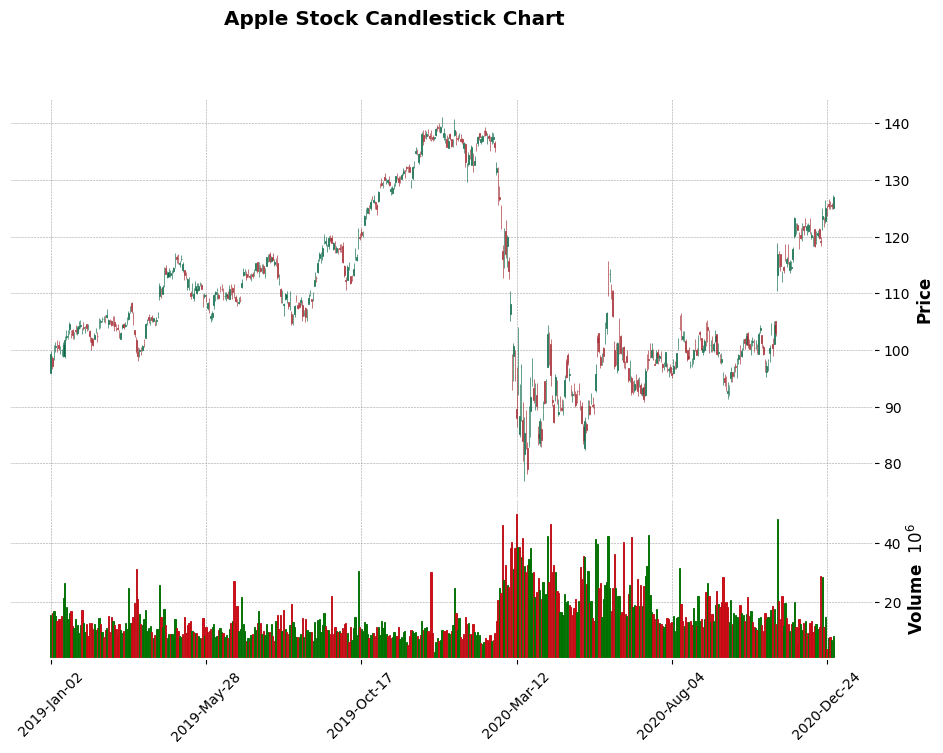

In [13]:
import mplfinance as mpf
temp_df = df.copy()
temp_df.rename(columns={
    'OPENPRC': 'Open',
    'ASKHI': 'High',
    'BIDLO': 'Low',
    'PRC': 'Close',
    'VOL': 'Volume'
}, inplace=True)

# Create a candlestick chart with volume using the temporary DataFrame
mpf.plot(temp_df[['Open', 'High', 'Low', 'Close', 'Volume']],
         type='candle',
         style='charles',
         title='Apple Stock Candlestick Chart',
         volume=True,
         figsize=(12, 8))

# Display the plot
mpf.show()


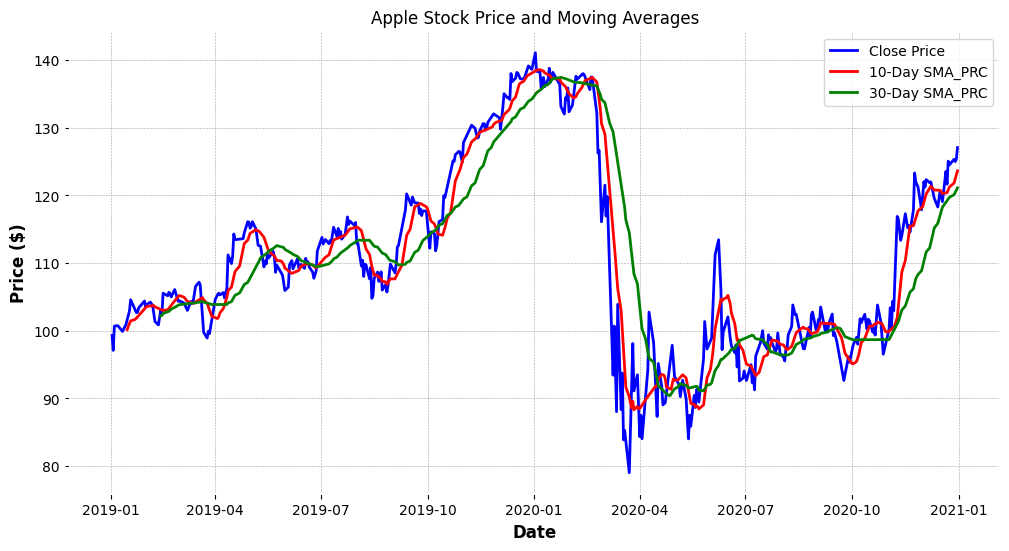

In [14]:
df['SMA_10_PRC'] = df['PRC'].rolling(window=10).mean()
df['SMA_30_PRC'] = df['PRC'].rolling(window=30).mean()

# Plotting the close price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PRC'], label='Close Price', color='blue')
plt.plot(df.index, df['SMA_10_PRC'], label='10-Day SMA_PRC', color='red')
plt.plot(df.index, df['SMA_30_PRC'], label='30-Day SMA_PRC', color='green')

# Adding titles and labels
plt.title('Apple Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


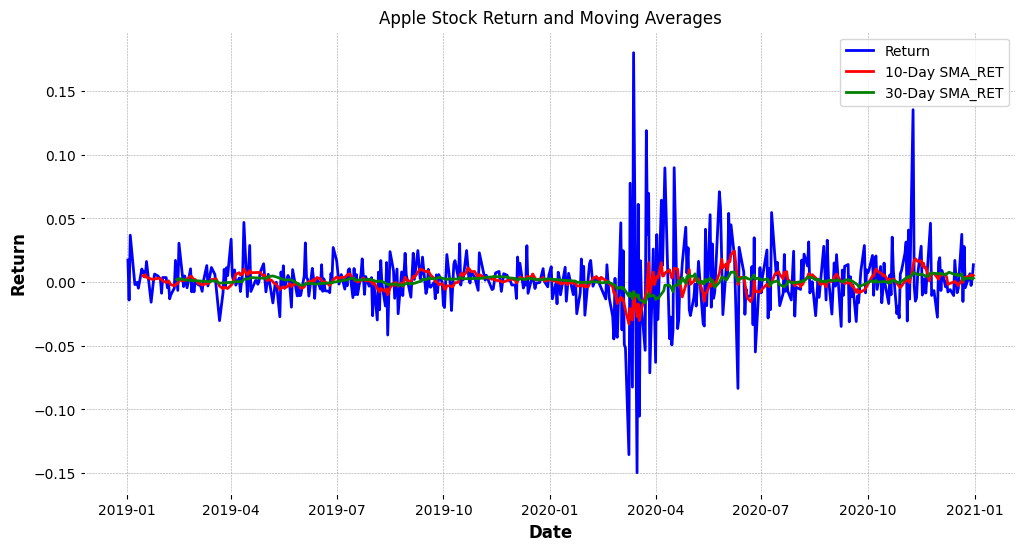

In [15]:
df['SMA_10_RET'] = df['RET'].rolling(window=10).mean()
df['SMA_30_RET'] = df['RET'].rolling(window=30).mean()

# Plotting the close price along with the moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RET'], label='Return', color='blue')
plt.plot(df.index, df['SMA_10_RET'], label='10-Day SMA_RET', color='red')
plt.plot(df.index, df['SMA_30_RET'], label='30-Day SMA_RET', color='green')

# Adding titles and labels
plt.title('Apple Stock Return and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


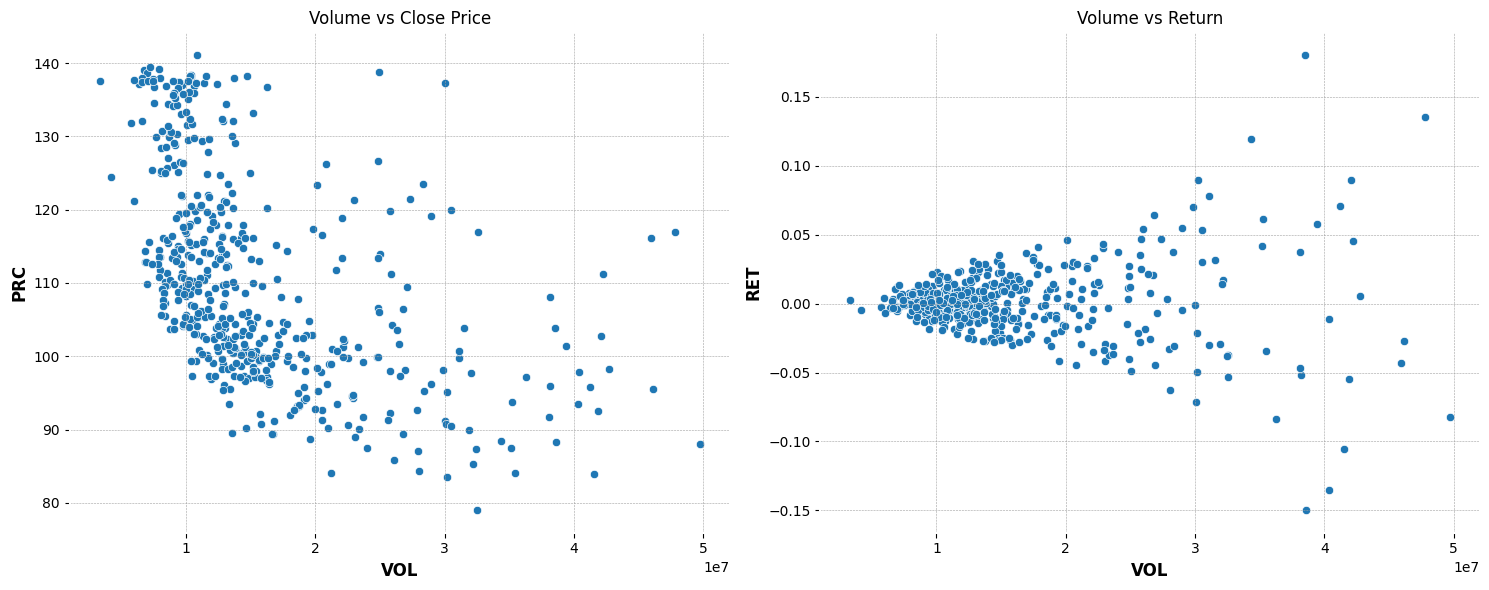

In [16]:
# Create a figure and two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for 'Volume vs Close Price'
sns.scatterplot(x='VOL', y='PRC', data=df, ax=axes[0])
axes[0].set_title('Volume vs Close Price')

# Scatter plot for 'Volume vs Return'
sns.scatterplot(x='VOL', y='RET', data=df, ax=axes[1])
axes[1].set_title('Volume vs Return')

# Display the plots
plt.tight_layout()
plt.show()



*   Volume vs. Price




A high trading volume can be associated with significant price events like earnings announcements or other market news, which could explain the spread in prices at higher volumes. If prices are generally higher at higher volumes, it may suggest periods of bullish sentiment, whereas lower volumes might indicate less trading confidence or interest.
*   Volume vs. Return

While volume increases may correspond to more significant price movements (not necessarily leading to positive returns), the overall returns do not dramatically shift from zero. It suggests that higher volumes are not consistently associated with positive or negative returns but rather with increased activity that could go either way, depending on other market conditions or news.



In [17]:
df.drop(columns=['SMA_10_PRC', 'SMA_30_PRC', 'SMA_10_RET', 'SMA_30_RET'], inplace=True)

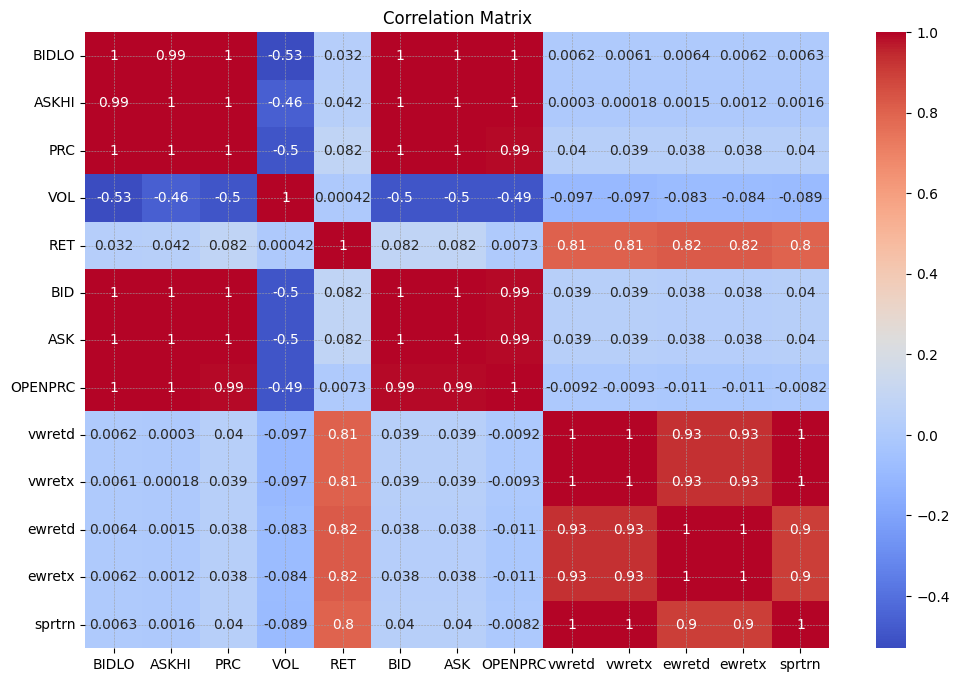

In [18]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant for VIF calculation (necessary as VIF assumes a model intercept)
numeric_df = add_constant(numeric_df)

# Calculate VIF values
VIFs = pd.Series([variance_inflation_factor(numeric_df.values, i)
                  for i in range(numeric_df.shape[1])],
                 index=numeric_df.columns)

# Print VIF values
print("Variance Inflation Factors:")
print(VIFs)

Variance Inflation Factors:
const         118.791852
BIDLO         575.393489
ASKHI         601.132403
PRC         63004.152535
VOL             3.246485
RET             5.785494
BID        923574.794241
ASK        935728.408690
OPENPRC       470.189435
vwretd      86924.966872
vwretx      88124.003118
ewretd      70237.030249
ewretx      70165.457657
sprtrn        422.597973
dtype: float64


# Prediction with Close Price (PRC)

In [20]:
df_prc = df[['PRC']]
df_prc.head(10)


PRC
date              
2019-01-02   99.31
2019-01-03   97.11
2019-01-04  100.69
2019-01-07  100.76
2019-01-08  100.57
2019-01-09  100.40
2019-01-10  100.39
2019-01-11   99.91
2019-01-14  100.94
2019-01-15  101.68

In [21]:
from sklearn.preprocessing import MinMaxScaler
import datetime

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled_prc = pd.DataFrame(scaler.fit_transform(df_prc), columns=df_prc.columns, index=df_prc.index)

In [22]:
def window_dataset(data, first_date_str, last_date_str, target_col='PRC', time_step=1):
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    dates, X, y = [], [], []

    target_date = first_date
    while target_date <= last_date:
        if target_date not in data.index:
            target_date += datetime.timedelta(days=1)
            continue

        start_idx = data.index.get_loc(target_date)
        if start_idx + time_step + 1 >= len(data):
            break

        X.append(data.iloc[start_idx:start_idx + time_step].values)
        y.append(data.iloc[start_idx + time_step][target_col])
        dates.append(target_date)

        next_week = data.loc[target_date:target_date + datetime.timedelta(days=7)]
        if len(next_week) < 2:
            break

        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if target_date == last_date:
            break

        target_date = next_date

    return np.array(dates), np.array(X).astype(np.float32), np.array(y).astype(np.float32)


In [23]:
time_step = 90 #Adjust as needed for actural data
dates, X, y = window_dataset(df_scaled_prc, '2019-01-02', '2020-12-31', target_col='PRC', time_step = time_step)
print("Dates:", dates.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)

Dates: (414,)
X shape: (414, 90, 1)
y shape: (414,)


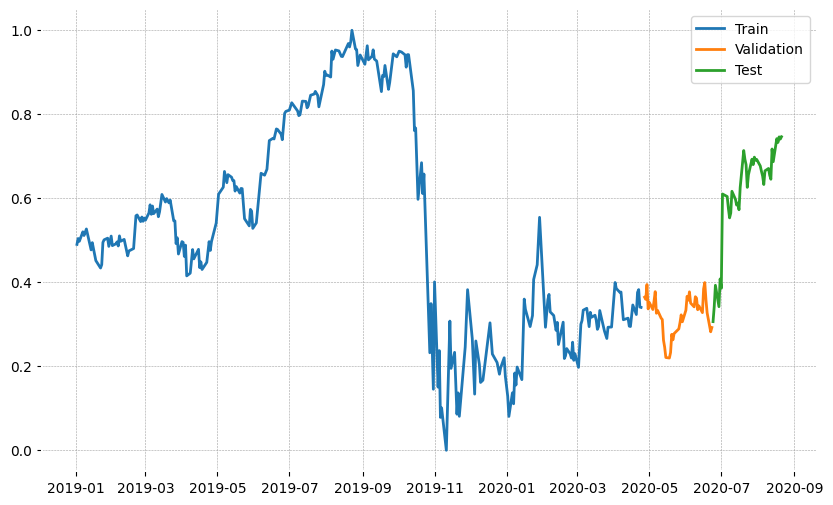

In [24]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(10, 6))
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluate_performance(true_values, predictions, dataset_type="Dataset"):
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predictions)

    print(f"{dataset_type} Performance:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print("")

## ARIMA Prediction



In [26]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

def evaluate_arima_model(order):
    # Fit ARIMA model
    train_series = pd.Series(y_train, index=dates_train)
    model = ARIMA(train_series, order=order)
    model_fit = model.fit()

    # Forecasting beyond the training data
    n_forecast_val = len(dates_val)

    # Get forecast for validation set
    val_forecast = model_fit.get_forecast(steps=n_forecast_val)
    val_pred = val_forecast.predicted_mean

    # Inverse transform the predictions
    val_pred_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
    y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

    # Calculate MSE and MAE for validation set
    val_mse = mean_squared_error(y_val_inv, val_pred_inv)
    val_mae = mean_absolute_error(y_val_inv, val_pred_inv)

    return val_mse, val_mae

# Grid search for ARIMA parameters
best_order = None
best_mse = float("inf")
best_mae = float("inf")

for p in range(6):
    for d in range(3):
        for q in range(6):
            order = (p, d, q)
            try:
                mse, mae = evaluate_arima_model(order)
                if mse < best_mse:
                    best_mse = mse
                    best_mae = mae
                    best_order = order
                print(f'Order {order} - Validation MSE: {mse}, Validation MAE: {mae}')
            except:
                continue

print(f'Best order: {best_order} - Validation MSE: {best_mse}, Validation MAE: {best_mae}')

Order (0, 0, 0) - Validation MSE: 168.34901022379128, Validation MAE: 12.656702498835113
Order (0, 0, 1) - Validation MSE: 165.2551974562737, Validation MAE: 12.4582567249032
Order (0, 0, 2) - Validation MSE: 164.7519405015968, Validation MAE: 12.444096228668682
Order (0, 0, 3) - Validation MSE: 161.48317454527594, Validation MAE: 12.196906612986036
Order (0, 0, 4) - Validation MSE: 158.92571068948598, Validation MAE: 11.965664375913203
Order (0, 0, 5) - Validation MSE: 156.18221245746685, Validation MAE: 11.816403127051503
Order (0, 1, 0) - Validation MSE: 9.164221672855142, Validation MAE: 2.295365666078359
Order (0, 1, 1) - Validation MSE: 9.349666884009402, Validation MAE: 2.3108864928626023
Order (0, 1, 2) - Validation MSE: 8.240935080349614, Validation MAE: 2.2567576309563955
Order (0, 1, 3) - Validation MSE: 8.42778331888875, Validation MAE: 2.255682084906508
Order (0, 1, 4) - Validation MSE: 8.454541837639955, Validation MAE: 2.2660959556021902
Order (0, 1, 5) - Validation MSE:

In [27]:
# Fit the best ARIMA model on the entire training data
train_series = pd.Series(y_train, index=dates_train)
best_model = ARIMA(train_series, order=best_order)
best_model_fit = best_model.fit()

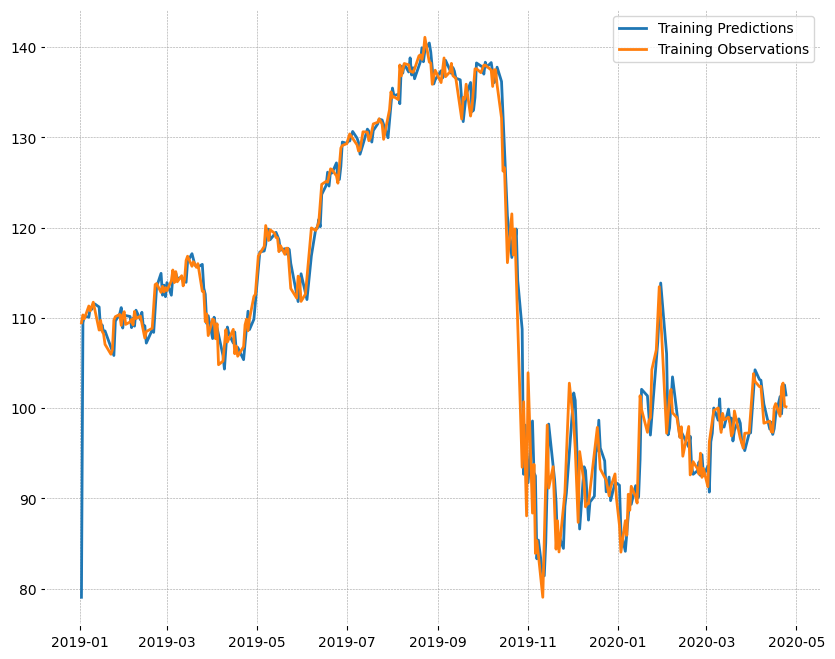

ARIMA Training Performance:
MSE: 9.994897227244994
RMSE: 3.1614707380023295
MAE: 1.9241625114442746



In [28]:
# Predicting and inverse transforming for training data
train_predictions_arima = best_model_fit.predict(start=0, end=len(dates_train)-1, typ='levels')
train_arima_inv = scaler.inverse_transform(train_predictions_arima.values.reshape(-1, 1)).flatten()
y_train_arima_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_arima_inv)
plt.plot(dates_train, y_train_arima_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_arima_inv, train_arima_inv, "ARIMA Training")

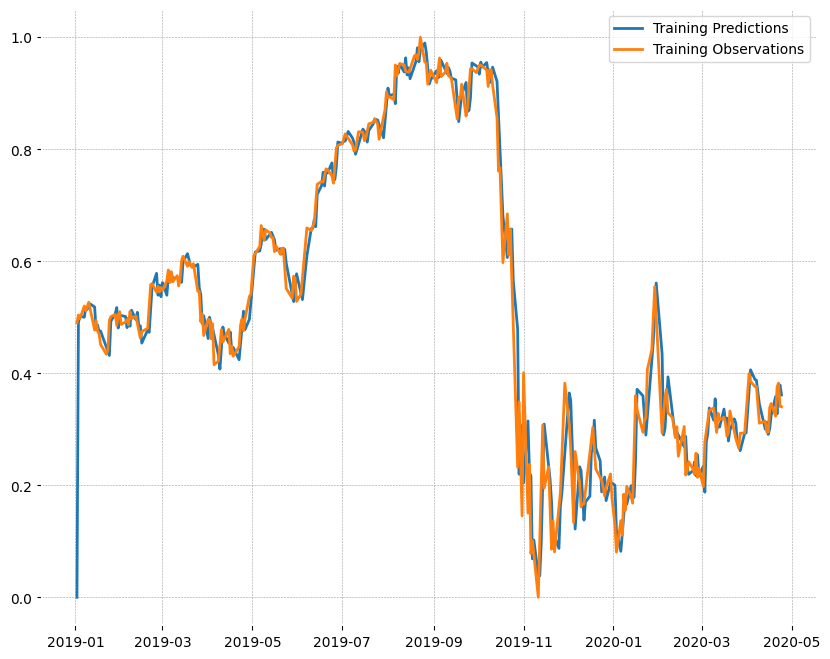

ARIMA Training Performance:
MSE: 0.0025951042623944096
RMSE: 0.05094216585888756
MAE: 0.03100487561930562



In [29]:
# Predicting for training data without inverse transforming
train_predictions_arima = best_model_fit.predict(start=0, end=len(dates_train)-1, typ='levels')

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_arima.values)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_train, train_predictions_arima.values, "ARIMA Training")


In [30]:
n_forecast_val = len(dates_val)
n_forecast_test = len(dates_test)

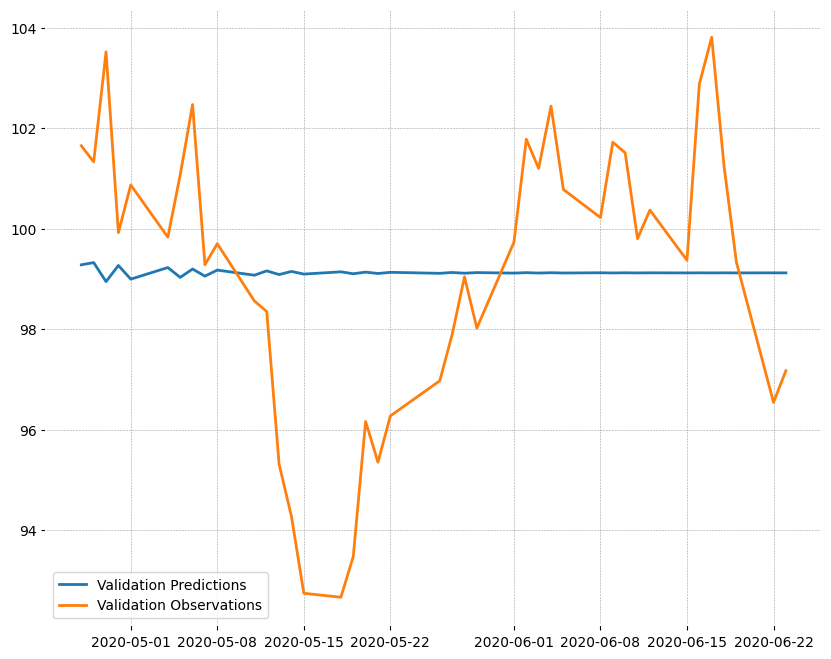

ARIMA Validation Performance:
MSE: 8.14863581895166
RMSE: 2.854581548835426
MAE: 2.3087886605928145



In [31]:
# Predicting and inverse transforming for validation data
val_forecast = best_model_fit.get_forecast(steps=n_forecast_val)
val_pred = val_forecast.predicted_mean
val_arima_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
y_val_arima_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_arima_inv)
plt.plot(dates_val, y_val_arima_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_arima_inv, val_arima_inv, "ARIMA Validation")

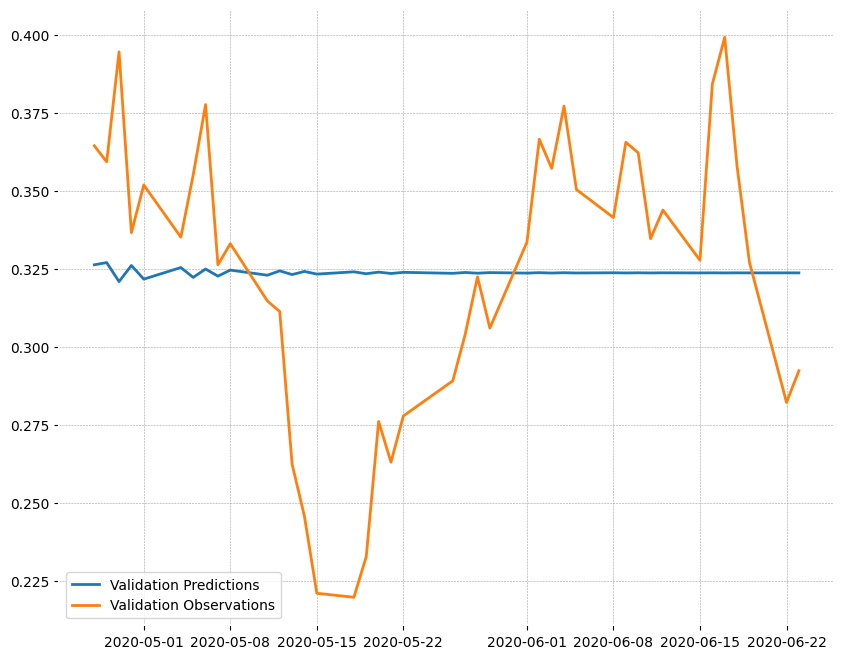

ARIMA Validation Performance:
MSE: 0.002115736508289366
RMSE: 0.045997135870501395
MAE: 0.03720253683060922



In [32]:
# Predicting for validation data without inverse transforming
val_forecast = best_model_fit.get_forecast(steps=n_forecast_val)
val_pred = val_forecast.predicted_mean

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_pred.values)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_val, val_pred.values, "ARIMA Validation")


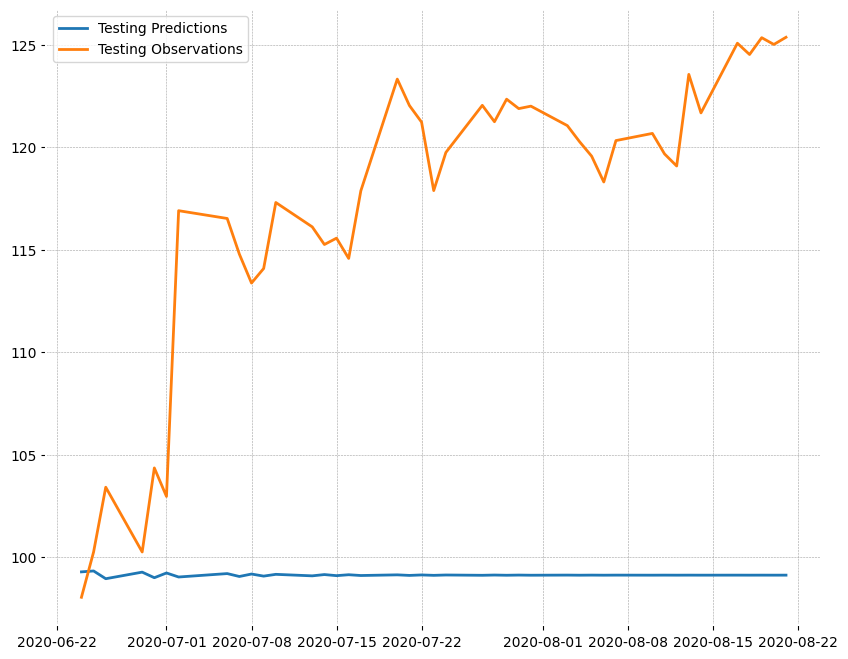

ARIMA Testing Performance:
MSE: 380.70325608886407
RMSE: 19.511618489732317
MAE: 18.18809913624495



In [33]:
# Predicting and inverse transforming for test data
test_forecast = best_model_fit.get_forecast(steps=n_forecast_test)
test_pred = test_forecast.predicted_mean
test_arima_inv = scaler.inverse_transform(test_pred.values.reshape(-1, 1)).flatten()
y_test_arima_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_arima_inv)
plt.plot(dates_test, y_test_arima_inv)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_test_arima_inv, test_arima_inv, "ARIMA Testing")

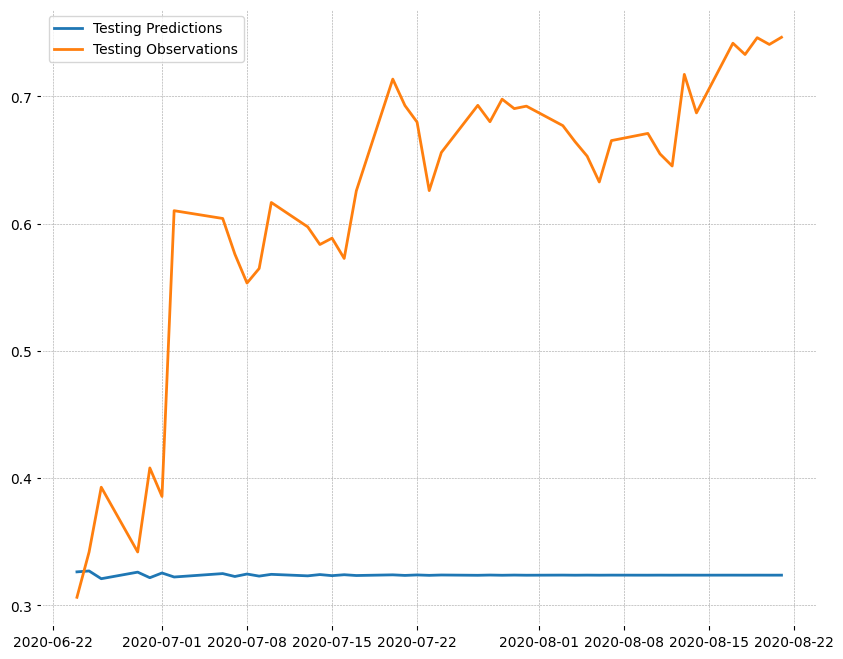

ARIMA Testing Performance:
MSE: 0.09884691313281489
RMSE: 0.31439928933255384
MAE: 0.29307283875783063



In [34]:
# Predicting for test data without inverse transforming
test_forecast = best_model_fit.get_forecast(steps=n_forecast_test)
test_pred = test_forecast.predicted_mean

# Plotting test data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_pred.values)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_test, test_pred.values, "ARIMA Testing")


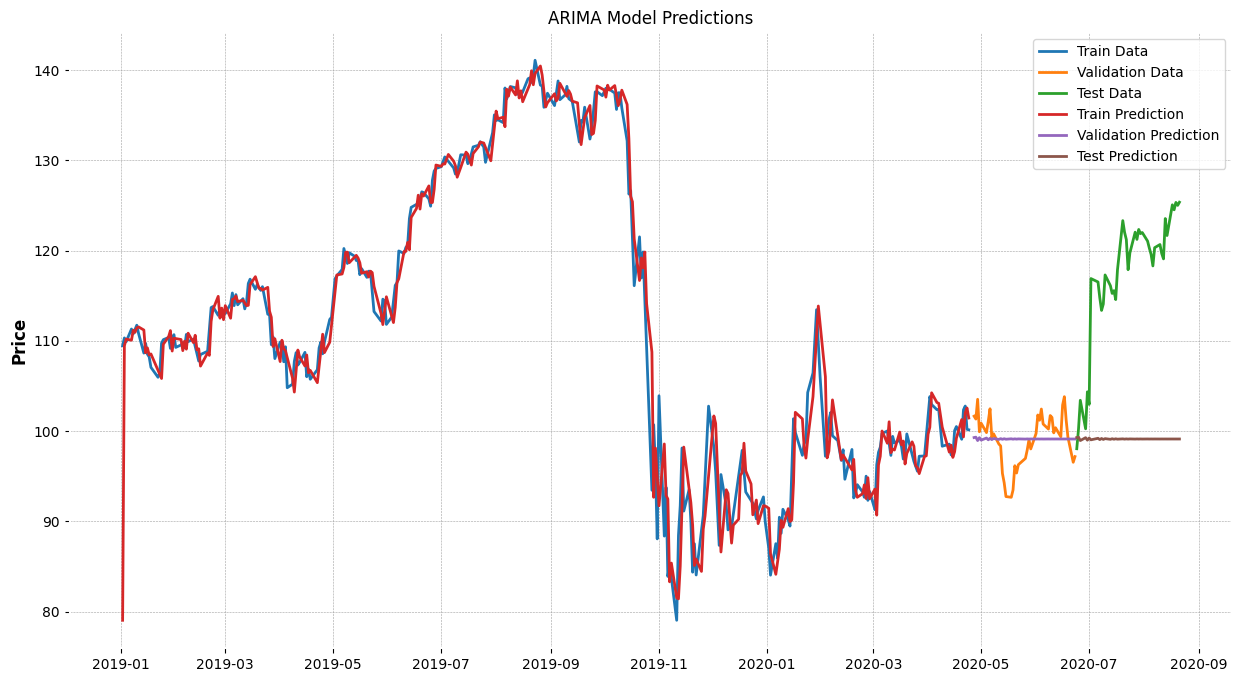

In [35]:
# Plot the predictions
plt.figure(figsize=(15, 8))
plt.plot(dates_train, y_train_arima_inv, label='Train Data')
plt.plot(dates_val, y_val_arima_inv, label='Validation Data')
plt.plot(dates_test, y_test_arima_inv, label='Test Data')
plt.plot(dates_train, train_arima_inv, label='Train Prediction')
plt.plot(dates_val, val_arima_inv, label='Validation Prediction')
plt.plot(dates_test, test_arima_inv, label='Test Prediction')
plt.title('ARIMA Model Predictions')
plt.ylabel('Price')
plt.legend()
plt.show()


## LSTM Prediction

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((90, 1)),
            layers.LSTM(64),
            layers.Dense(32, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(1)
          ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - loss: 0.2179 - mean_absolute_error: 0.4075 - val_loss: 0.0066 - val_mean_absolute_error: 0.0677
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0238 - mean_absolute_error: 0.1191 - val_loss: 0.0019 - val_mean_absolute_error: 0.0339
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0172 - mean_absolute_error: 0.1052 - val_loss: 0.0069 - val_mean_absolute_error: 0.0711
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0088 - mean_absolute_error: 0.0743 - val_loss: 0.0043 - val_mean_absolute_error: 0.0526
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0085 - mean_absolute_error: 0.0720 - val_loss: 0.0040 - val_mean_absolute_error: 0.0503
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0074 - mean_absolute_error: 0.0622 - val_loss: 0.0019 - val_mean_absolute_error: 0.0346
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0056 - mean_absolute_error: 0.0562 - 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


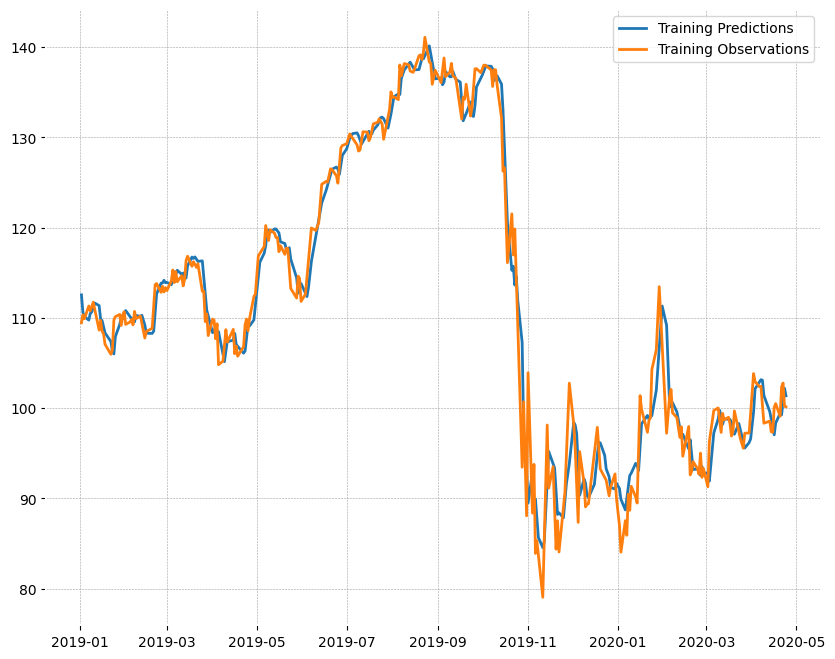

LSTM Training Performance:
MSE: 6.933065414428711
RMSE: 2.6330714225769043
MAE: 1.8052849769592285



In [37]:
# Predicting and inverse transforming for training data
train_predictions = model.predict(X_train).flatten()
train_predictions_inv = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_inv)
plt.plot(dates_train, y_train_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

evaluate_performance(y_train_inv, train_predictions_inv, "LSTM Training")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


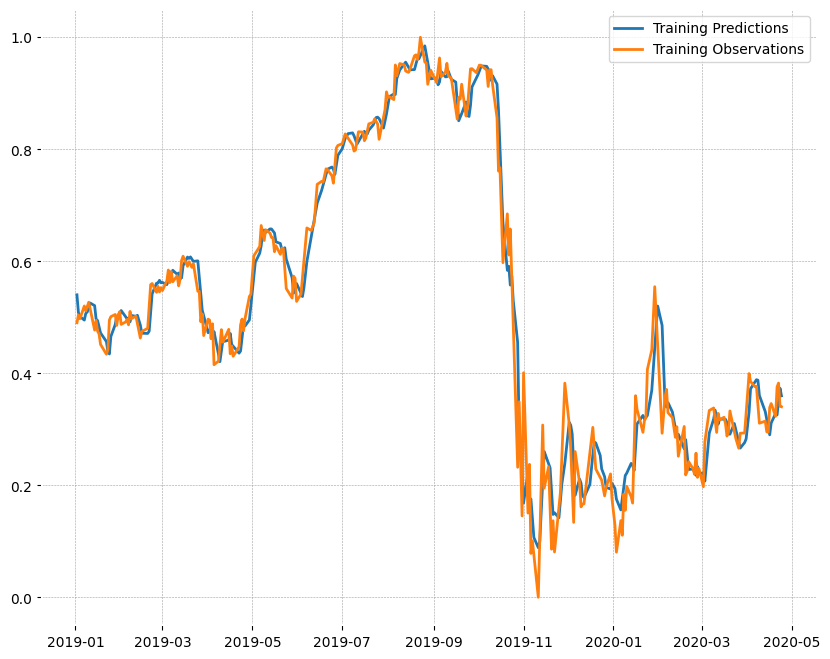

LSTM Training Performance:
MSE: 0.0018001218559220433
RMSE: 0.04242784157395363
MAE: 0.029089346528053284



In [38]:
# Predicting training data without inverse transforming
train_predictions = model.predict(X_train).flatten()

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

evaluate_performance(y_train, train_predictions, "LSTM Training")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


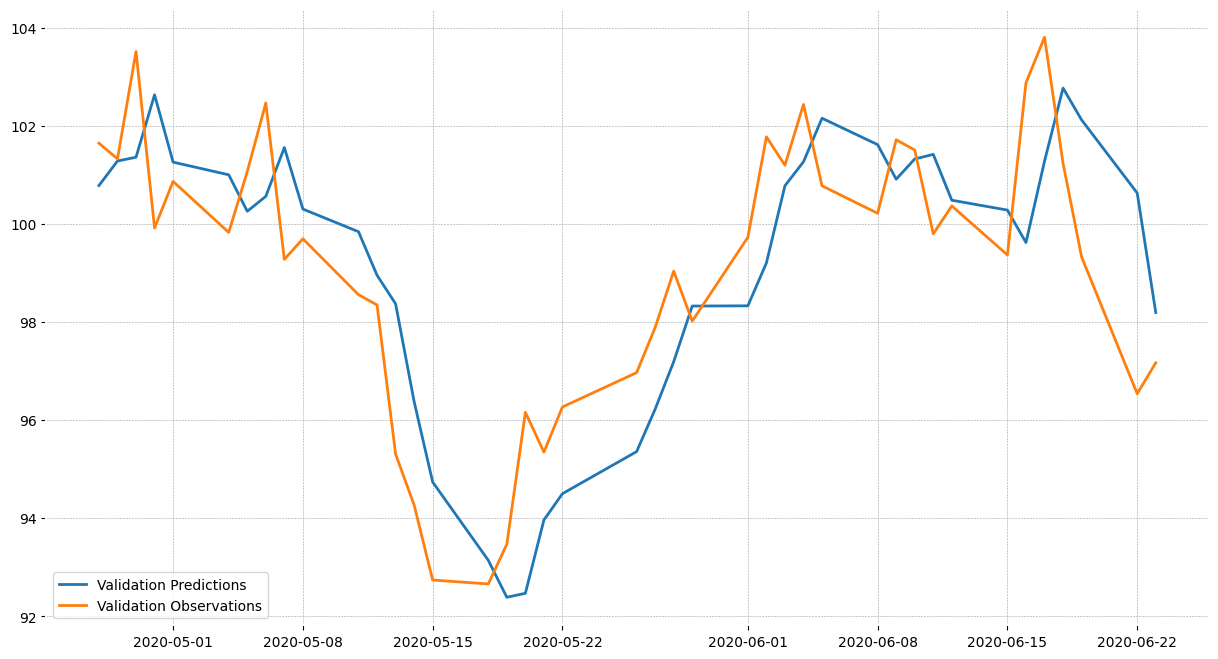

LSTM Validation Performance:
MSE: 3.3184056282043457
RMSE: 1.821649193763733
MAE: 1.5380544662475586



In [39]:
# Predicting and inverse transforming for validation data
val_predictions = model.predict(X_val).flatten()
val_predictions_inv = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Plotting validation data
plt.figure(figsize=(15, 8))
plt.plot(dates_val, val_predictions_inv)
plt.plot(dates_val, y_val_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

evaluate_performance(y_val_inv, val_predictions_inv, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


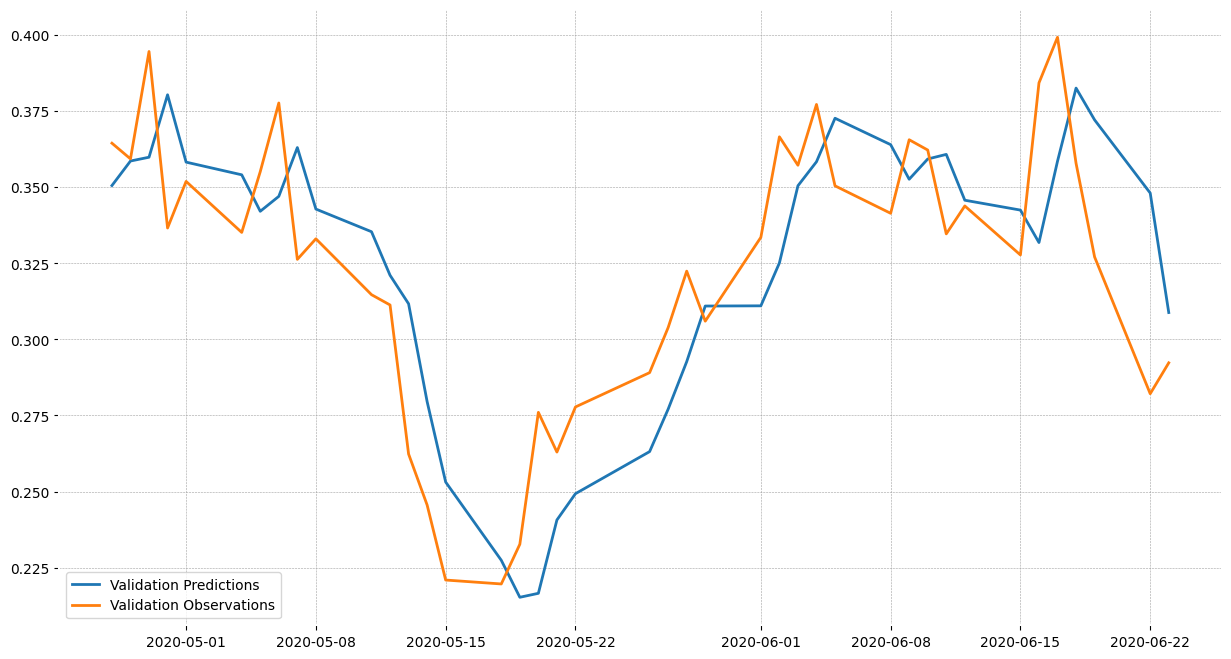

LSTM Validation Performance:
MSE: 0.0008616001578047872
RMSE: 0.029353026300668716
MAE: 0.024783337488770485



In [40]:
# Predicting validation data without inverse transforming
val_predictions = model.predict(X_val).flatten()

# Plotting validation data
plt.figure(figsize=(15, 8))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

evaluate_performance(y_val, val_predictions, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


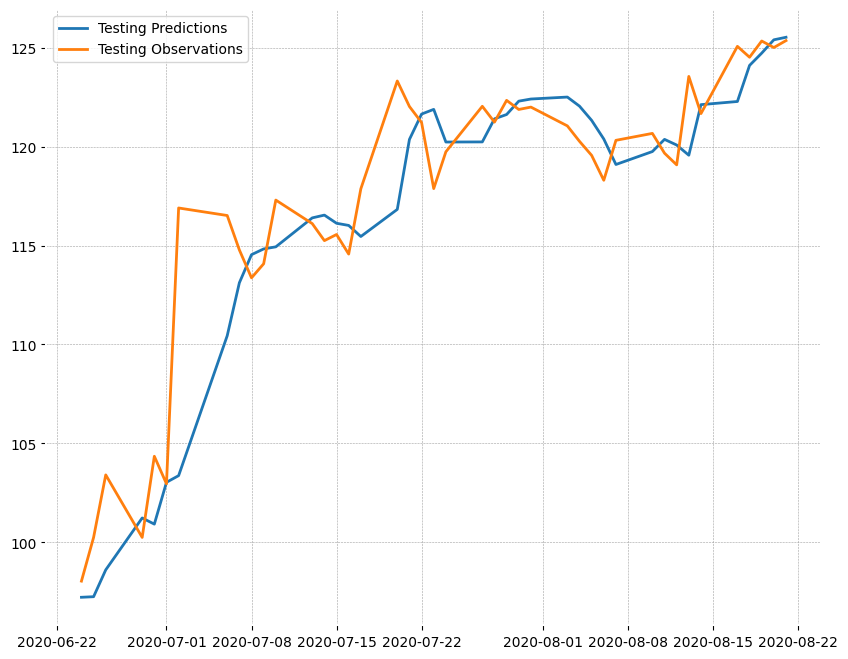

LSTM Testing Performance:
MSE: 9.339753150939941
RMSE: 3.056101083755493
MAE: 1.9283093214035034



In [41]:
# Predicting and inverse transforming for test data
test_predictions = model.predict(X_test).flatten()
test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions_inv)
plt.plot(dates_test, y_test_inv)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv, test_predictions_inv, "LSTM Testing")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


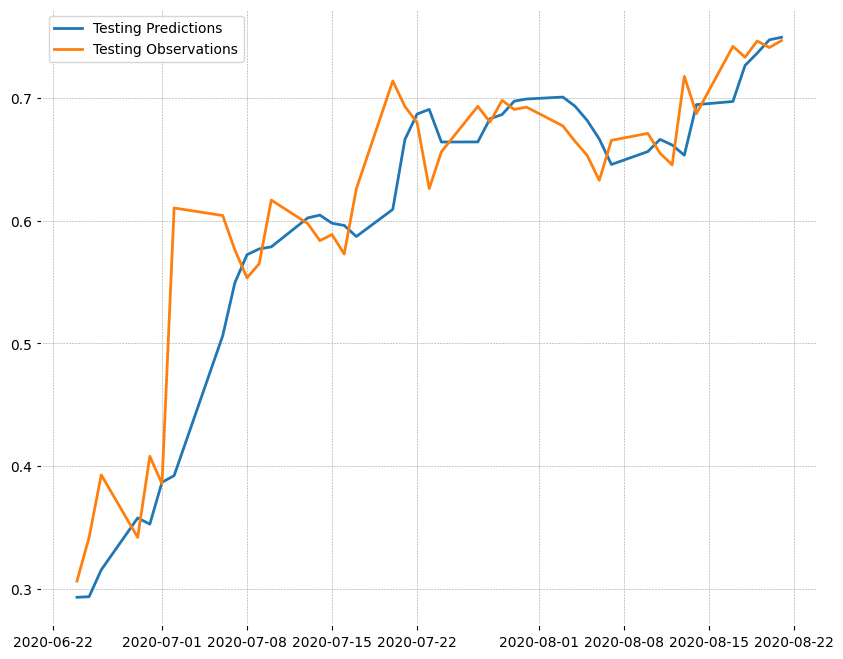

LSTM Testing Performance:
MSE: 0.0024250035639852285
RMSE: 0.04924432560801506
MAE: 0.031071707606315613



In [42]:
# Predicting for test data without inverse transforming
test_predictions = model.predict(X_test).flatten()

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

evaluate_performance(y_test, test_predictions, "LSTM Testing")


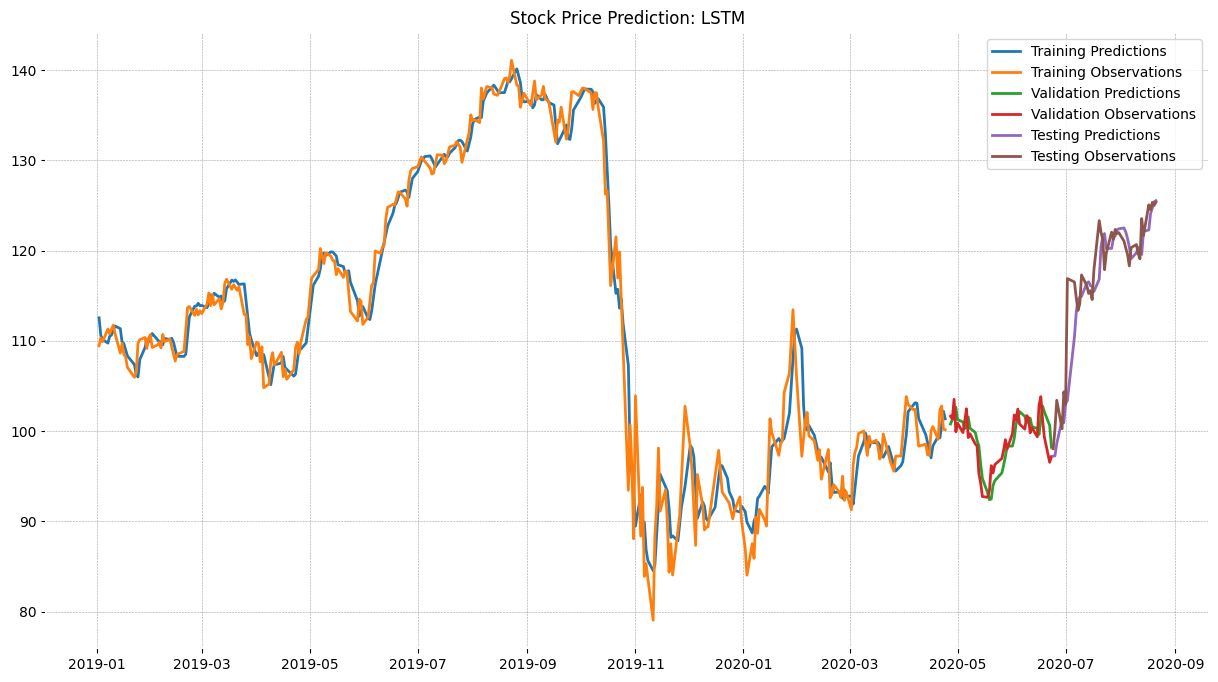

In [43]:
plt.figure(figsize=(15, 8))
plt.plot(dates_train, train_predictions_inv, label='Training Predictions')
plt.plot(dates_train, y_train_inv, label='Training Observations')
plt.plot(dates_val, val_predictions_inv, label='Validation Predictions')
plt.plot(dates_val, y_val_inv, label='Validation Observations')
plt.plot(dates_test, test_predictions_inv, label='Testing Predictions')
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.title('Stock Price Prediction: LSTM')
plt.legend()
plt.show()

## SVR Prediction

In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
# Combine train and validation sets for hyperparameter tuning
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# # Reshape for GridSearchCV
X_train_val = X_train_val.reshape(-1, time_step)
X_test = X_test.reshape(-1, time_step)

# Define the SVR model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)

# Print the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the SVR model using the best parameters
best_svr = grid_search.best_estimator_


Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


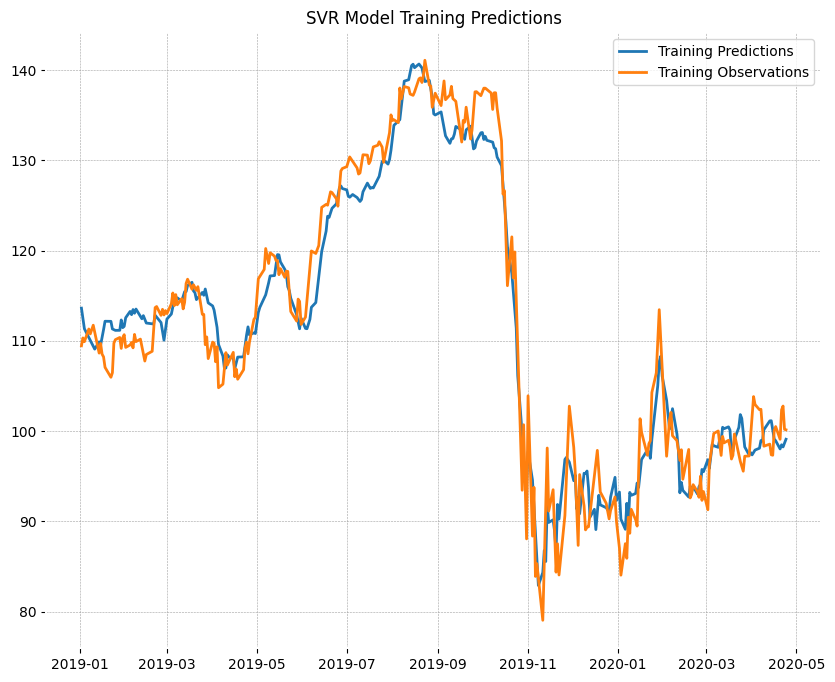

SVR Training Performance:
MSE: 10.569944746844872
RMSE: 3.25114514392158
MAE: 2.6713130623790904



In [45]:
# Train predictions and evaluation
train_predictions_svr = best_svr.predict(X_train.reshape(-1, time_step))
train_svr_inv = scaler.inverse_transform(train_predictions_svr.reshape(-1, 1)).flatten()
y_train_svr_inv = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_svr_inv)
plt.plot(dates_train, y_train_svr_inv)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

evaluate_performance(y_train_svr_inv, train_svr_inv, "SVR Training")

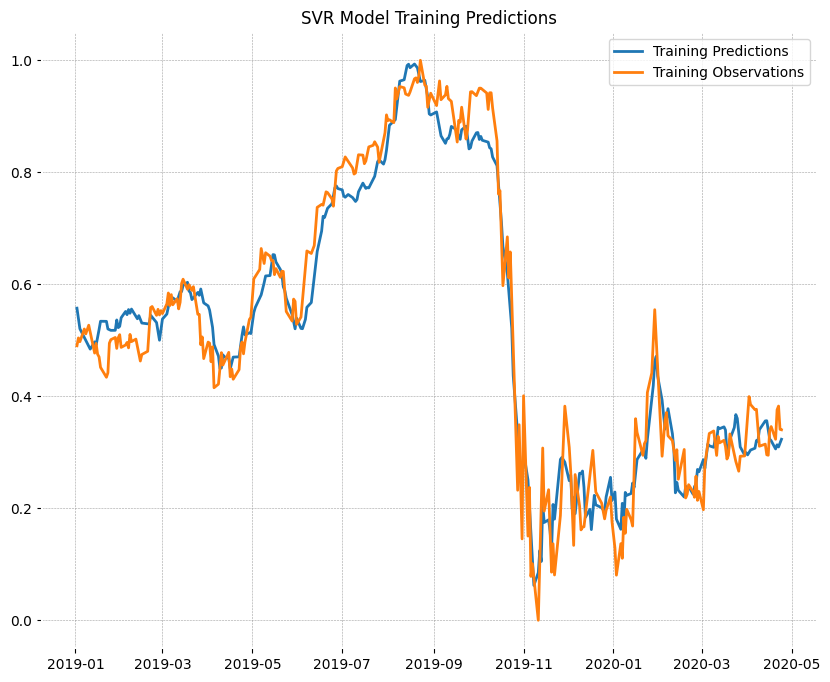

SVR Training Performance:
MSE: 0.002744411374593214
RMSE: 0.052387129856418115
MAE: 0.043044043152792616



In [46]:
# Train predictions and evaluation without inverse transforming
train_predictions_svr = best_svr.predict(X_train.reshape(-1, time_step))

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_train, train_predictions_svr)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

evaluate_performance(y_train, train_predictions_svr, "SVR Training")

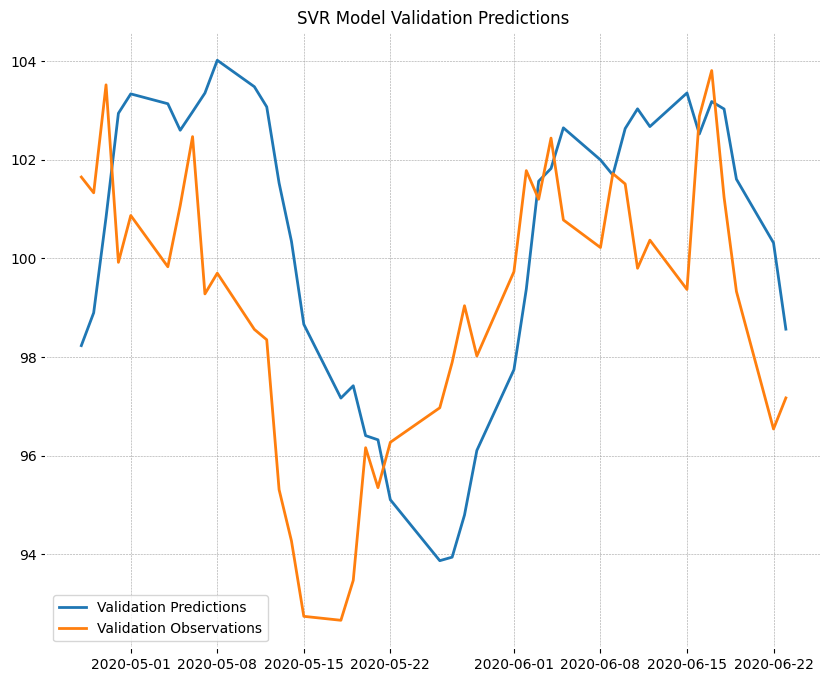

SVR Validation Performance:
MSE: 9.904879063614334
RMSE: 3.1472017831105674
MAE: 2.67284738674733



In [47]:
# Validation predictions and evaluation
val_predictions_svr = best_svr.predict(X_val.reshape(-1, time_step))
val_svr_inv = scaler.inverse_transform(val_predictions_svr.reshape(-1, 1)).flatten()
y_val_svr_inv = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_svr_inv)
plt.plot(dates_val, y_val_svr_inv)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

evaluate_performance(y_val_svr_inv, val_svr_inv, "SVR Validation")

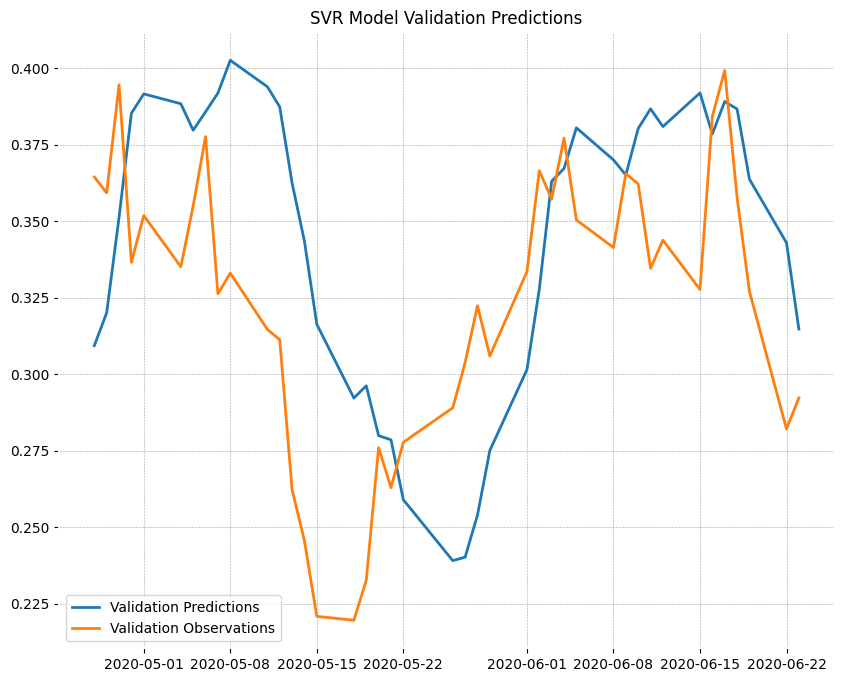

SVR Validation Performance:
MSE: 0.0025717324449760714
RMSE: 0.05071225142878268
MAE: 0.04306876865248225



In [48]:
# Validation predictions and evaluation without inverse transforming
val_predictions_svr = best_svr.predict(X_val.reshape(-1, time_step))

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_val, val_predictions_svr)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

evaluate_performance(y_val, val_predictions_svr, "SVR Validation")



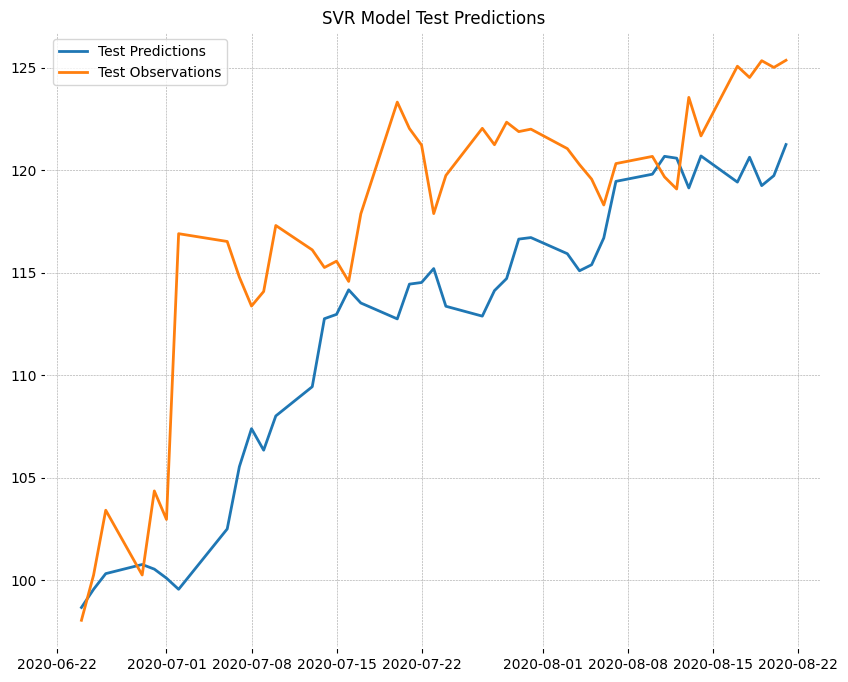

SVR Test Performance:
MSE: 38.410754886262175
RMSE: 6.197641074333216
MAE: 5.021406640183342



In [49]:
# Test predictions and evaluation
test_predictions_svr = best_svr.predict(X_test)
test_svr_inv = scaler.inverse_transform(test_predictions_svr.reshape(-1, 1)).flatten()
y_test_svr_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_svr_inv)
plt.plot(dates_test, y_test_svr_inv)
plt.legend(['Test Predictions', 'Test Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

evaluate_performance(y_test_svr_inv, test_svr_inv, "SVR Test")

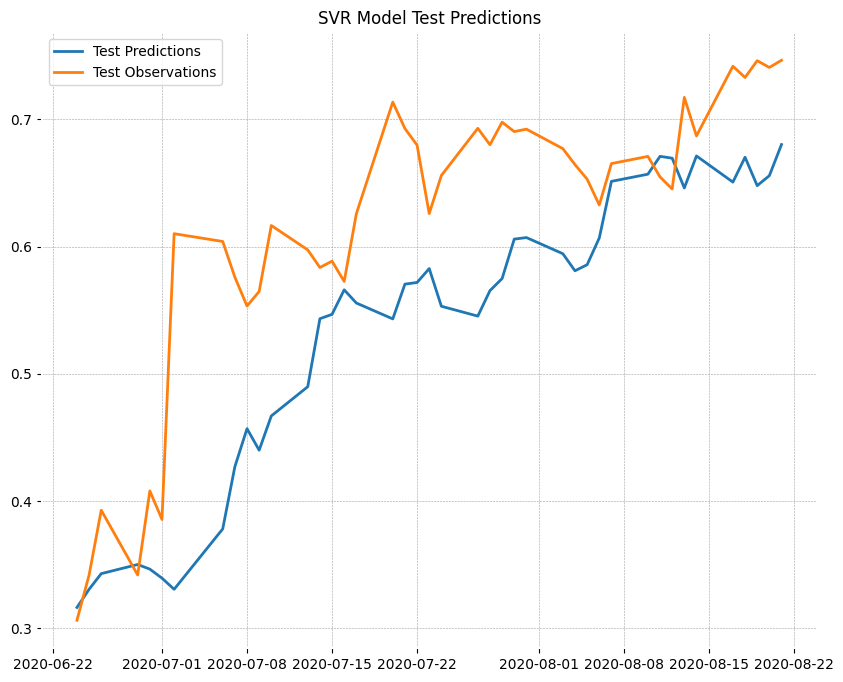

SVR Test Performance:
MSE: 0.009973084019616852
RMSE: 0.09986532941725497
MAE: 0.08091214700138162



In [50]:
# Test predictions and evaluation without inverse transforming
test_predictions_svr = best_svr.predict(X_test)

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_test, test_predictions_svr)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

evaluate_performance(y_test, test_predictions_svr, "SVR Test")

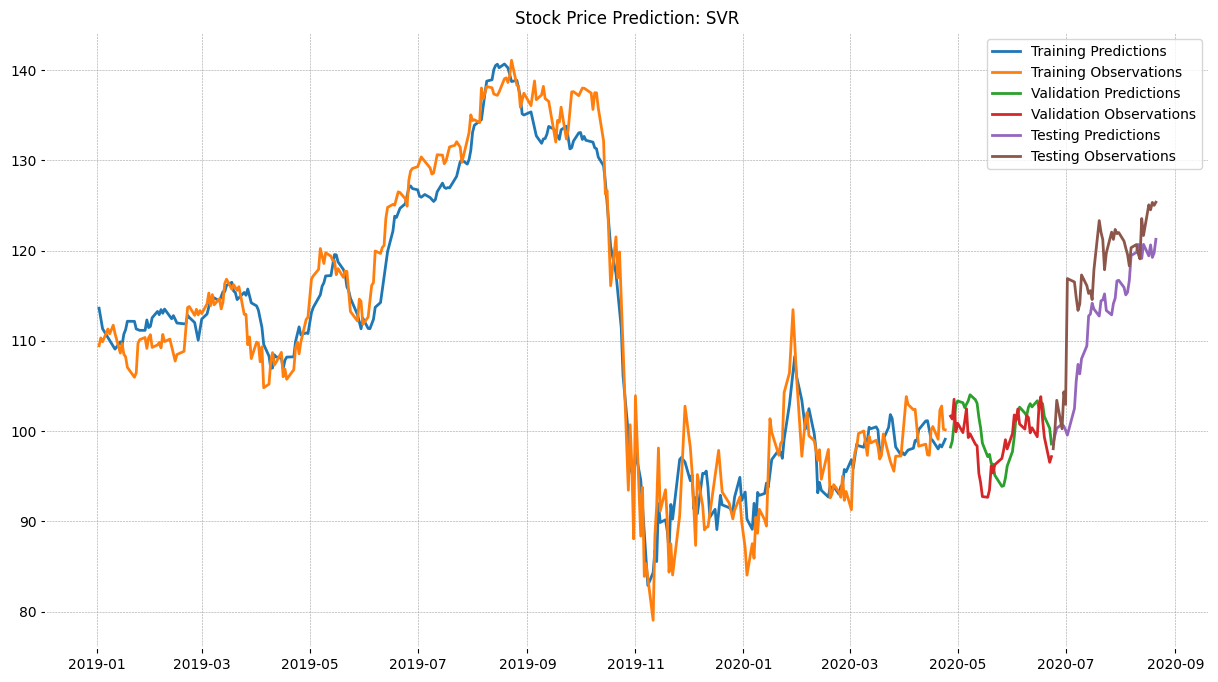

In [51]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_train, train_svr_inv, label='Training Predictions')
plt.plot(dates_train, y_train_svr_inv, label='Training Observations')
plt.plot(dates_val, val_svr_inv, label='Validation Predictions')
plt.plot(dates_val, y_val_svr_inv, label='Validation Observations')
plt.plot(dates_test, test_svr_inv, label='Testing Predictions')
plt.plot(dates_test, y_test_svr_inv, label='Testing Observations')
plt.title('Stock Price Prediction: SVR')
plt.legend()
plt.show()

## Summary Comparision

ARIMA Performance:
MSE: 380.70325608886407
RMSE: 19.511618489732317
MAE: 18.18809913624495

SVR Performance:
MSE: 38.410754886262175
RMSE: 6.197641074333216
MAE: 5.021406640183342

LSTM Performance:
MSE: 9.339753150939941
RMSE: 3.056101083755493
MAE: 1.9283093214035034



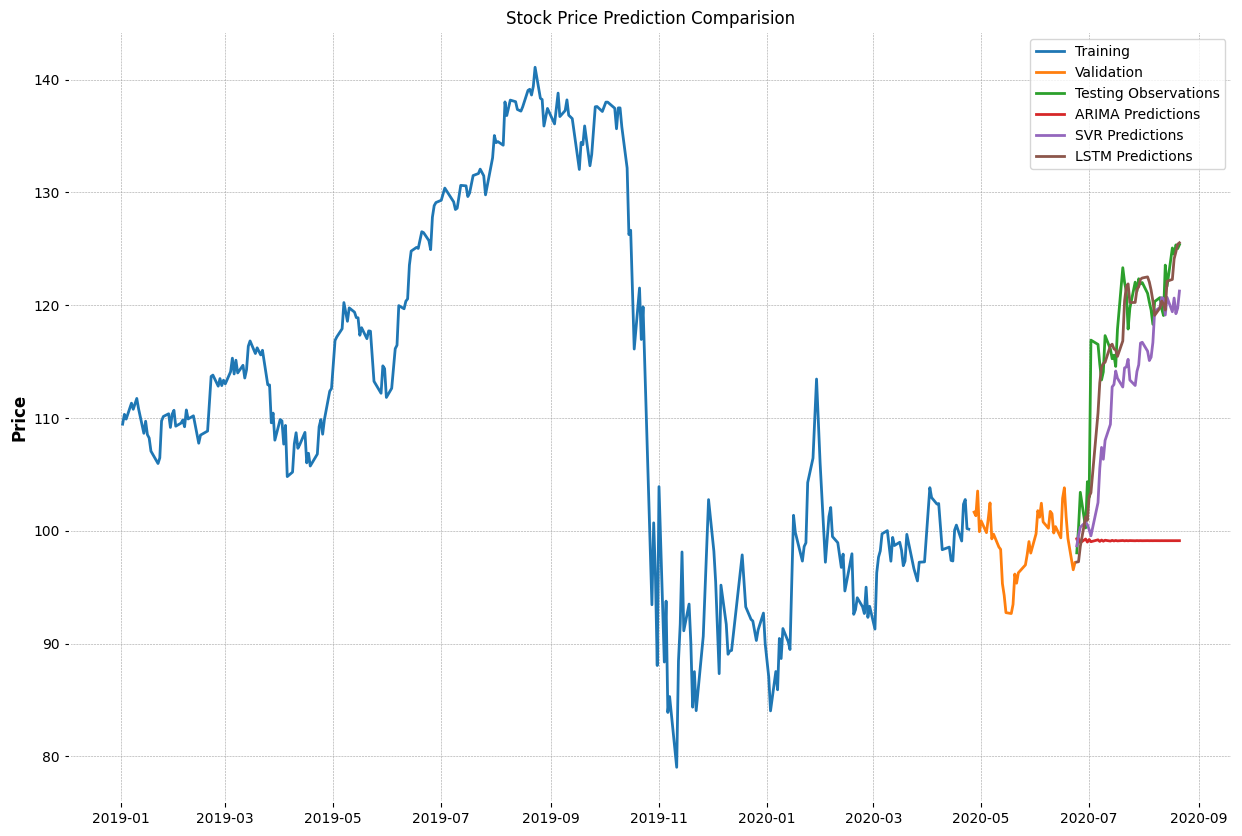

In [52]:
evaluate_performance(y_test_arima_inv, test_arima_inv, "ARIMA")
evaluate_performance(y_test_svr_inv, test_svr_inv, "SVR")
evaluate_performance(y_test_inv, test_predictions_inv, "LSTM")

plt.figure(figsize=(15, 10))
plt.plot(dates_train, y_train_inv, label='Training')
plt.plot(dates_val, y_val_inv, label='Validation')
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.plot(dates_test, test_arima_inv, label='ARIMA Predictions')
plt.plot(dates_test, test_svr_inv, label='SVR Predictions')
plt.plot(dates_test, test_predictions_inv, label='LSTM Predictions')

plt.title('Stock Price Prediction Comparision')
plt.legend()
plt.ylabel('Price')
plt.show()

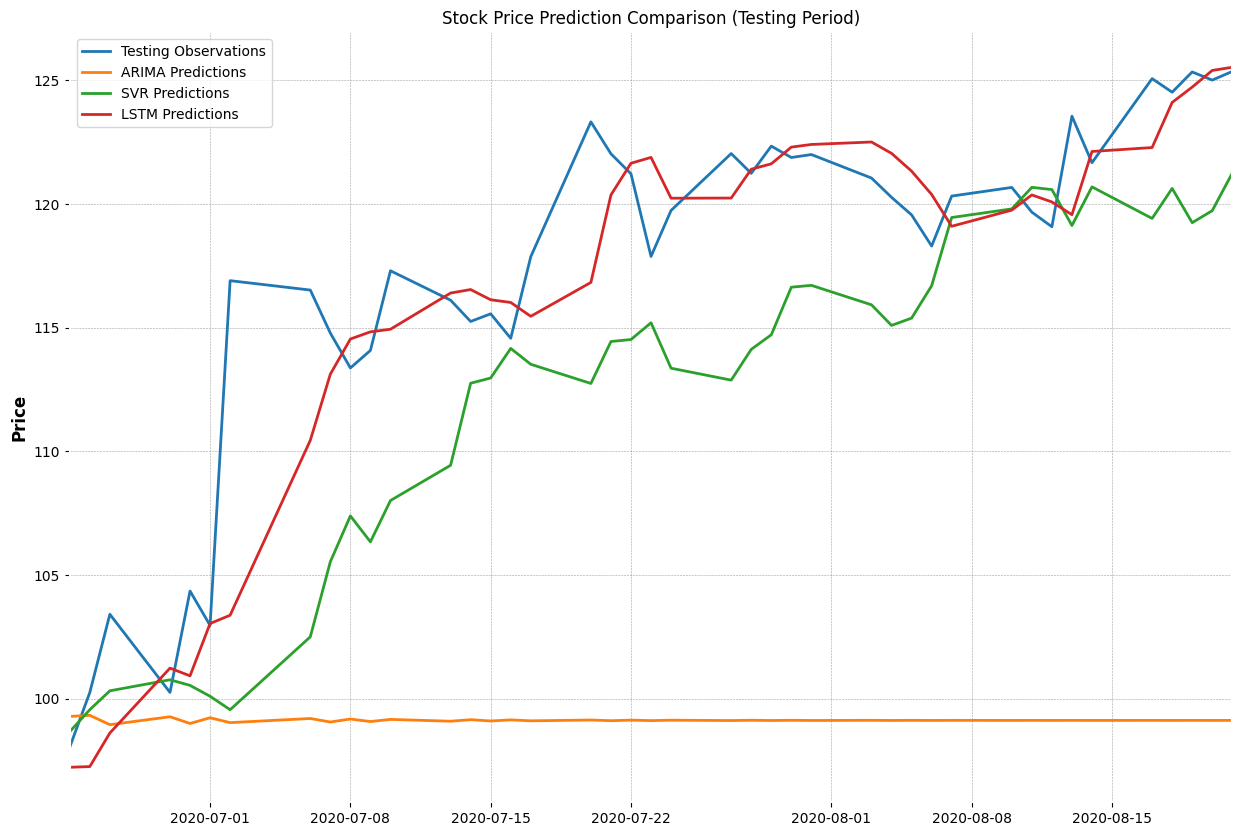

In [53]:
# Plot the predictions focusing on the testing period
plt.figure(figsize=(15, 10))
plt.plot(dates_test, y_test_inv, label='Testing Observations')
plt.plot(dates_test, test_arima_inv, label='ARIMA Predictions')
plt.plot(dates_test, test_svr_inv, label='SVR Predictions')
plt.plot(dates_test, test_predictions_inv, label='LSTM Predictions')

plt.title('Stock Price Prediction Comparison (Testing Period)')
plt.legend()
plt.ylabel('Price')

# Set x-axis limits to focus on the testing period
plt.xlim(dates_test[0], dates_test[-1])

plt.show()

# Prediction with Return(RET)

In [54]:
df_ret = df[['RET']]
df_ret.head(10)

RET
date                
2019-01-02  0.017312
2019-01-03 -0.014097
2019-01-04  0.036865
2019-01-07  0.000695
2019-01-08 -0.001886
2019-01-09 -0.001690
2019-01-10 -0.000100
2019-01-11 -0.004781
2019-01-14  0.010309
2019-01-15  0.007331

In [55]:
# Normalize the data
scaler_ret = MinMaxScaler(feature_range=(0, 1))
df_scaled_ret = pd.DataFrame(scaler_ret.fit_transform(df_ret), columns=df_ret.columns, index=df_ret.index)

In [56]:
time_step_r = 90 #Adjust as needed for actural data
# dates_r, X_r, y_r = window_dataset(df_scaled_ret, '2022-01-03', '2023-12-29', target_col='RET', time_step=time_step)
dates_r, X_r, y_r = window_dataset(df_scaled_ret, '2019-01-02', '2020-12-31', target_col='RET', time_step=time_step_r)
print("Dates:", dates_r.shape)
print("X shape:", X_r.shape)
print("y shape:", y_r.shape)

Dates: (414,)
X shape: (414, 90, 1)
y shape: (414,)


In [57]:
# Split the dataset into training, validation, and test sets
dates_r_train, X_r_train, y_r_train = dates_r[:q_80], X_r[:q_80], y_r[:q_80]
dates_r_val, X_r_val, y_r_val = dates_r[q_80:q_90], X_r[q_80:q_90], y_r[q_80:q_90]
dates_r_test, X_r_test, y_r_test = dates_r[q_90:], X_r[q_90:], y_r[q_90:]


In [58]:
# Function to inverse transform predictions
def inverse_transform_predictions(predictions, original_data, scaler):
    dummy = np.zeros((predictions.shape[0], original_data.shape[1]))
    dummy[:, 0] = predictions
    inverse_transformed = scaler.inverse_transform(dummy)
    return inverse_transformed[:, 0]

## ARIMA Prediction

In [59]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
# Define a function to fit ARIMA model and return performance metrics
def evaluate_arima_model(order):
    try:
        # Fit ARIMA model
        train_series = pd.Series(y_r_train, index=dates_r_train)
        model = ARIMA(train_series, order=order)
        model_fit = model.fit()

        # Forecasting beyond the training data
        n_forecast_val = len(dates_r_val)

        # Get forecast for validation set
        val_forecast = model_fit.get_forecast(steps=n_forecast_val)
        val_pred = val_forecast.predicted_mean

        # Inverse transform the predictions
        val_pred_inv = scaler.inverse_transform(val_pred.values.reshape(-1, 1)).flatten()
        y_val_inv = scaler.inverse_transform(y_r_val.reshape(-1, 1)).flatten()

        # Calculate MSE and MAE for validation set
        val_mse = mean_squared_error(y_val_inv, val_pred_inv)
        val_mae = mean_absolute_error(y_val_inv, val_pred_inv)

        return val_mse, val_mae
    except Exception as e:
        print(f"Error for order {order}: {e}")
        return float("inf"), float("inf")

# Grid search for ARIMA parameters
best_order = None
best_mse = float("inf")
best_mae = float("inf")

for p in range(6):
    for d in range(3):
        for q in range(6):
            order = (p, d, q)
            mse, mae = evaluate_arima_model(order)
            if mse < best_mse:
                best_mse = mse
                best_mae = mae
                best_order = order
            print(f'Order {order} - Validation MSE: {mse}, Validation MAE: {mae}')

print(f'Best order: {best_order} - Validation MSE: {best_mse}, Validation MAE: {best_mae}')


Order (0, 0, 0) - Validation MSE: 10.069688258484351, Validation MAE: 2.6722586915159203
Order (0, 0, 1) - Validation MSE: 10.039361376337807, Validation MAE: 2.666537076658782
Order (0, 0, 2) - Validation MSE: 10.175319216280982, Validation MAE: 2.6814023621044147
Order (0, 0, 3) - Validation MSE: 10.25359921324163, Validation MAE: 2.707493935394429
Order (0, 0, 4) - Validation MSE: 10.204907676794145, Validation MAE: 2.676116943040221
Order (0, 0, 5) - Validation MSE: 10.14203661935384, Validation MAE: 2.6713616559606637
Order (0, 1, 0) - Validation MSE: 10.059187664460685, Validation MAE: 2.669105099294244
Order (0, 1, 1) - Validation MSE: 10.06975383739513, Validation MAE: 2.6722662784476703
Order (0, 1, 2) - Validation MSE: 10.040120668205763, Validation MAE: 2.666680206391005
Order (0, 1, 3) - Validation MSE: 10.181144947771458, Validation MAE: 2.68204295101684
Order (0, 1, 4) - Validation MSE: 10.254054565898546, Validation MAE: 2.707037149303727
Order (0, 1, 5) - Validation MSE

In [60]:
# Fit the best ARIMA model on the entire training data
train_series = pd.Series(y_r_train, index=dates_r_train)
best_model = ARIMA(train_series, order=best_order)
best_model_fit = best_model.fit()

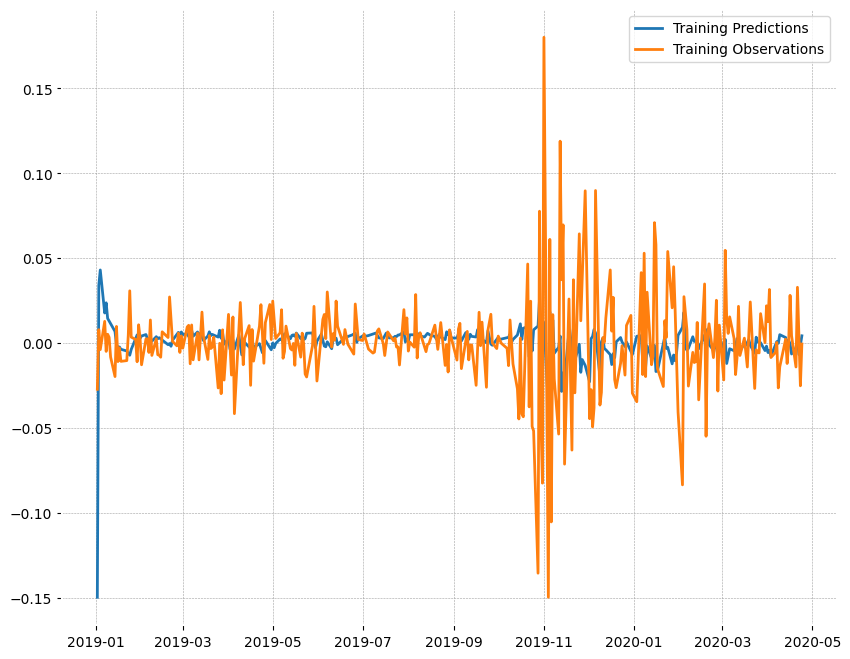

ARIMA Training Performance:
MSE: 0.0008550758641330436
RMSE: 0.029241680254955316
MAE: 0.018248772521118863



In [61]:
# Predicting and inverse transforming for training data
train_predictions_arima_ret = best_model_fit.predict(start=0, end=len(dates_r_train)-1, typ='levels')
train_predictions_inv_arima_ret = inverse_transform_predictions(train_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_train_inv_arima_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_arima_ret)
plt.plot(dates_r_train, y_train_inv_arima_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_arima_ret, train_predictions_inv_arima_ret, "ARIMA Training")

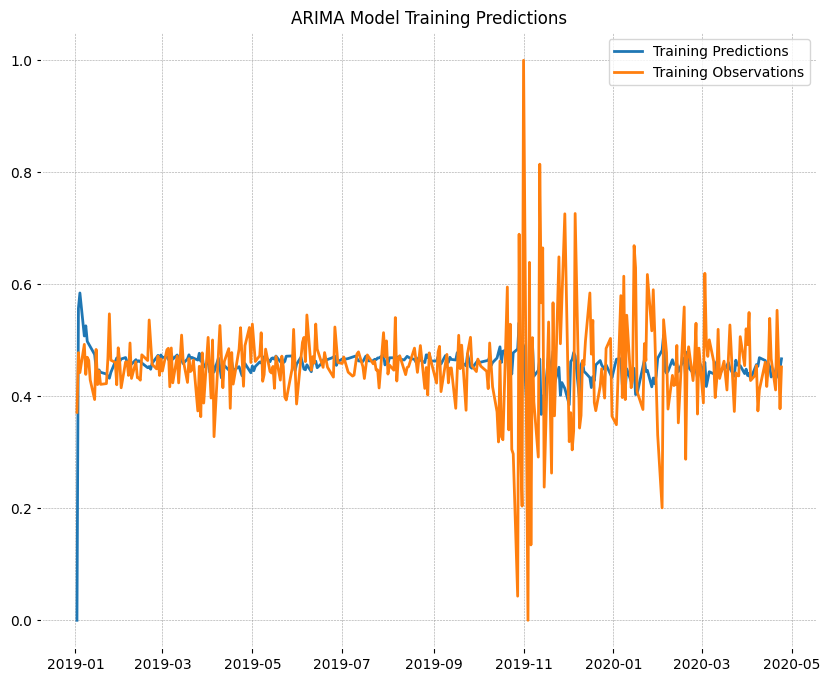

ARIMA Training Performance:
MSE: 0.00786270214131375
RMSE: 0.08867187908978669
MAE: 0.05533720827329888



In [62]:
# Predicting for training data without inverse transforming
train_predictions_arima_ret = best_model_fit.predict(start=0, end=len(dates_r_train)-1, typ='levels')

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_arima_ret.values)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('ARIMA Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_arima_ret.values, "ARIMA Training")


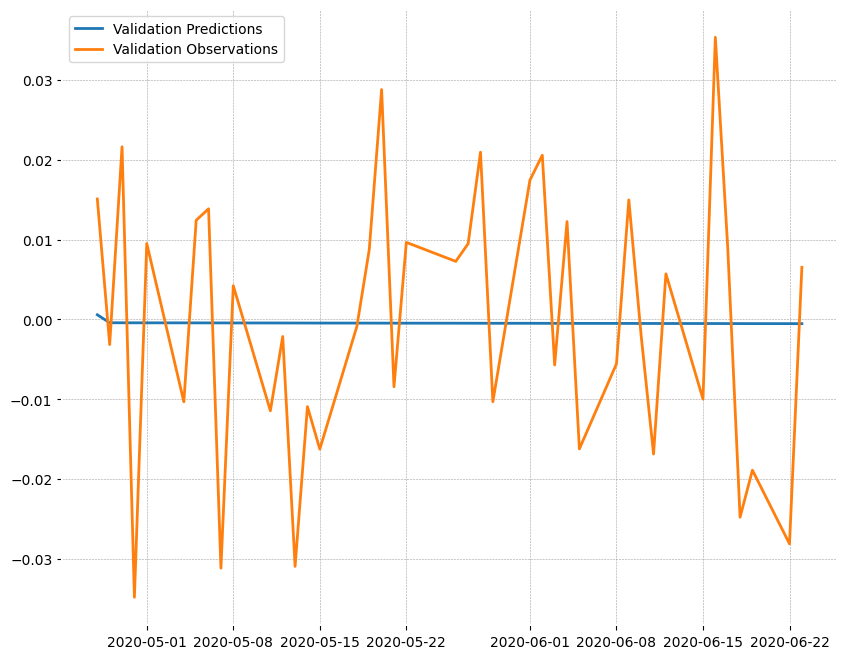

ARIMA Validation Performance:
MSE: 0.00028327341520558065
RMSE: 0.01683072830288638
MAE: 0.014158476843633968



In [63]:
# Validation predictions and evaluation
val_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_val))
val_predictions_arima_ret = val_forecast_ret.predicted_mean
val_predictions_inv_arima_ret = inverse_transform_predictions(val_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_val_inv_arima_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_arima_ret)
plt.plot(dates_r_val, y_val_inv_arima_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_inv_arima_ret, val_predictions_inv_arima_ret, "ARIMA Validation")


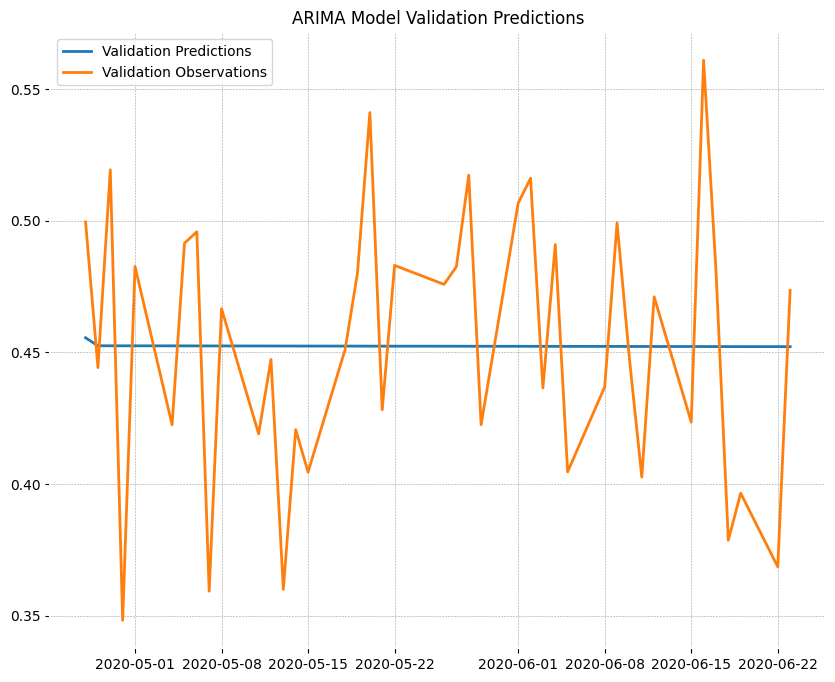

ARIMA Validation Performance:
MSE: 0.002604791670236674
RMSE: 0.051037159699935046
MAE: 0.04293387848536868



In [64]:
# Validation predictions and evaluation without inverse transforming
val_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_val))
val_predictions_arima_ret = val_forecast_ret.predicted_mean

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_arima_ret.values)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('ARIMA Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_arima_ret.values, "ARIMA Validation")

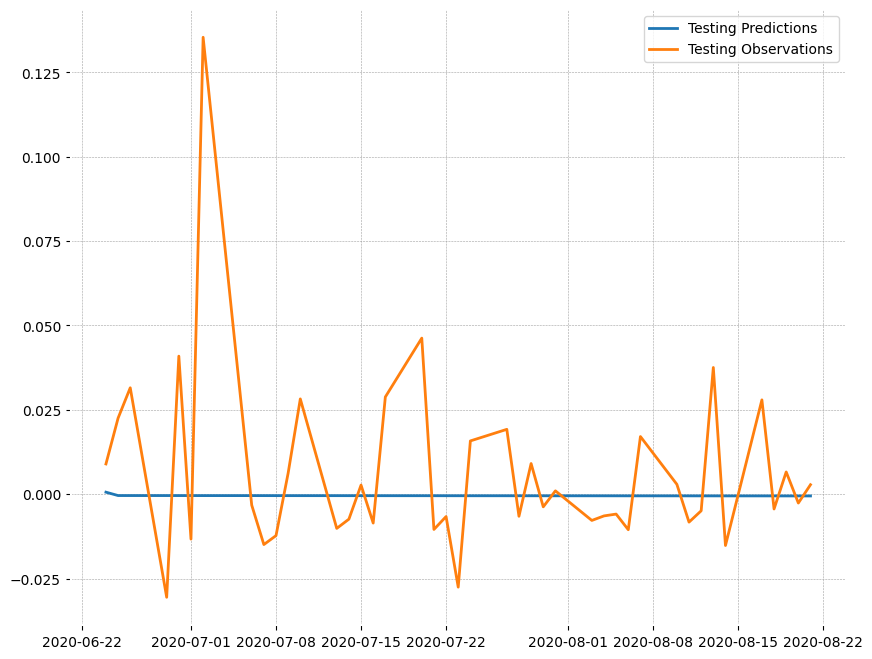

ARIMA Test Performance:
MSE: 0.0007658357383330583
RMSE: 0.027673737339453417
MAE: 0.016926969276090047



In [65]:
# Test predictions and evaluation
test_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_test))
test_predictions_arima_ret = test_forecast_ret.predicted_mean
test_predictions_inv_arima_ret = inverse_transform_predictions(test_predictions_arima_ret.values, df_scaled_ret, scaler_ret)
y_test_inv_arima_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_arima_ret)
plt.plot(dates_r_test, y_test_inv_arima_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv_arima_ret, test_predictions_inv_arima_ret, "ARIMA Test")

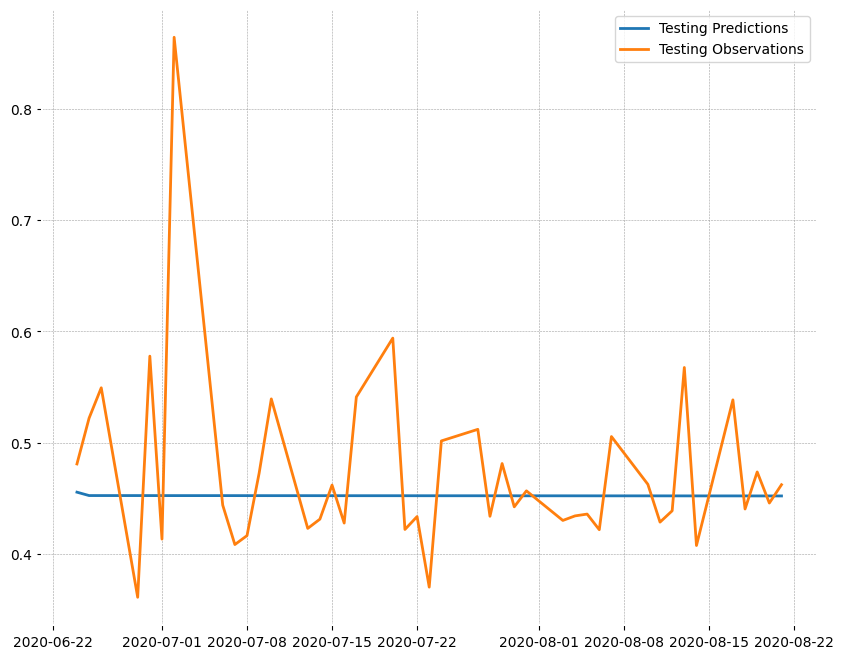

ARIMA Test Performance:
MSE: 0.007042110007152567
RMSE: 0.08391728074212466
MAE: 0.05132899887829253



In [66]:
# Test predictions and evaluation without inverse transforming
test_forecast_ret = best_model_fit.get_forecast(steps=len(dates_r_test))
test_predictions_arima_ret = test_forecast_ret.predicted_mean

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_arima_ret.values)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_r_test, test_predictions_arima_ret.values, "ARIMA Test")

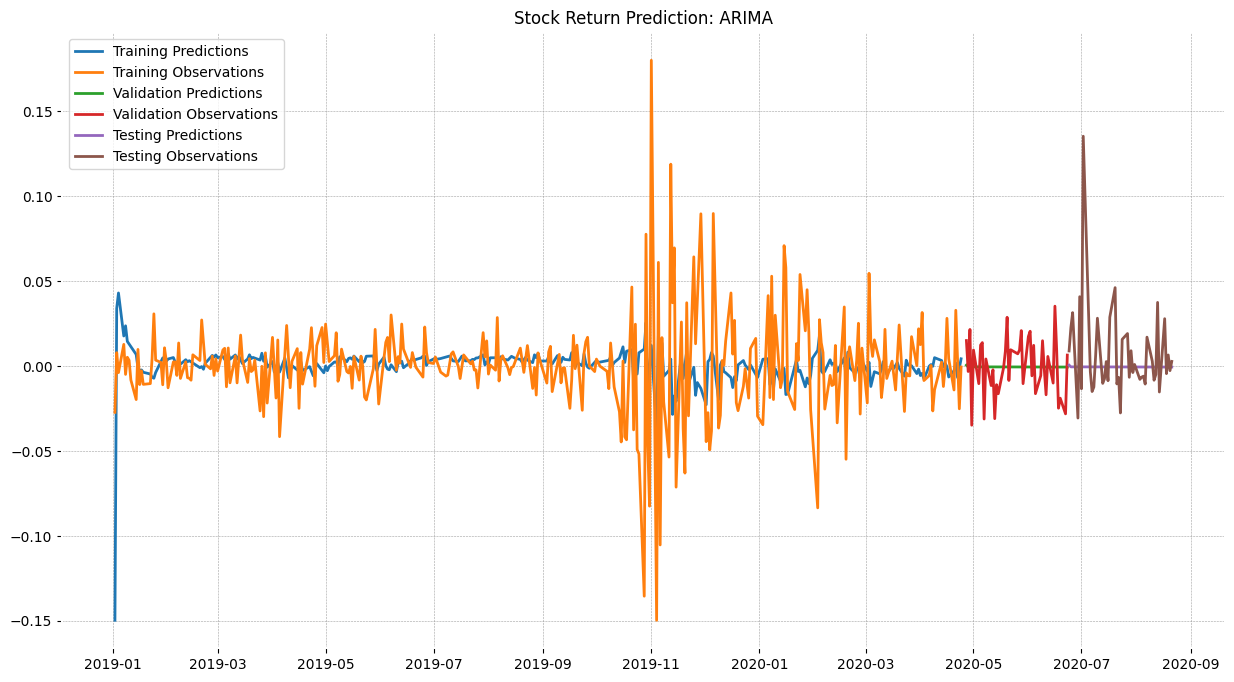

In [67]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_arima_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_arima_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_arima_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_arima_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_arima_ret, label='Testing Observations')
plt.title('Stock Return Prediction: ARIMA')
plt.legend()
plt.show()

## LSTM Prediction

In [68]:
model_r = Sequential([layers.Input((time_step_r, X_r_train.shape[2])),
            layers.LSTM(256),
            layers.Dense(128, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(1)
          ])
model_r.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

model_r.fit(X_r_train, y_r_train, validation_data=(X_r_val, y_r_val), epochs=100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - loss: 0.1243 - mean_absolute_error: 0.3129 - val_loss: 0.0225 - val_mean_absolute_error: 0.1406
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - loss: 0.0185 - mean_absolute_error: 0.1152 - val_loss: 0.0065 - val_mean_absolute_error: 0.0657
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - loss: 0.0100 - mean_absolute_error: 0.0644 - val_loss: 0.0035 - val_mean_absolute_error: 0.0490
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - loss: 0.0107 - mean_absolute_error: 0.0604 - val_loss: 0.0028 - val_mean_absolute_error: 0.0441
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - loss: 0.0069 - mean_absolute_error: 0.0525 - val_loss: 0.0027 - val_mean_absolute_error: 0.0443
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - loss: 0.0088 - mean_absolute_error: 0.0577 - val_loss: 0.0028 - val_mean_absolute_error: 0.0450
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - loss: 0.0076 - mean_absolute_error: 0.0

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


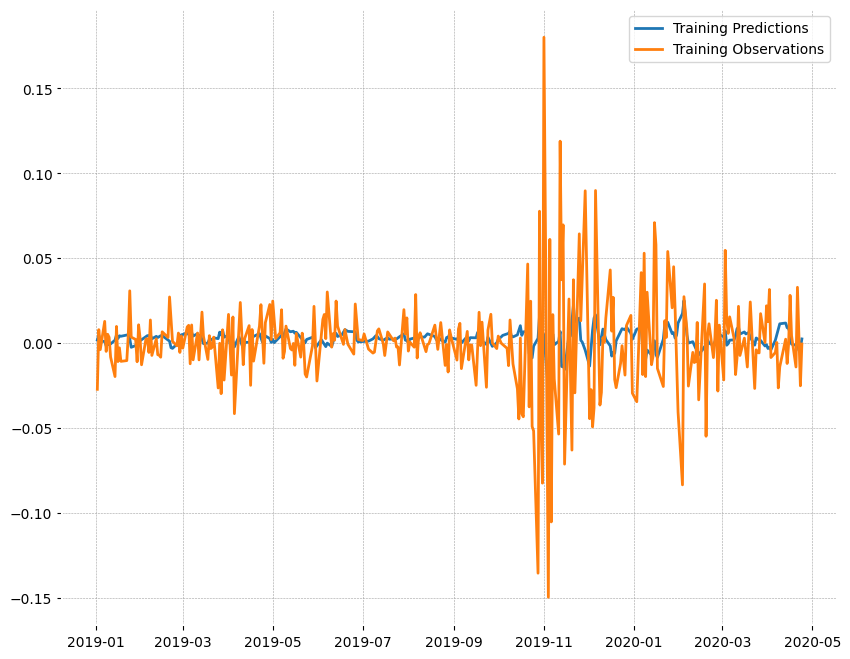

LSTM Training Performance:
MSE: 0.0007934451546084685
RMSE: 0.028168158523561113
MAE: 0.017563358379488515



In [69]:
# Predicting and inverse transforming for training data
train_predictions_ret = model_r.predict(X_r_train).flatten()
train_predictions_inv_ret = inverse_transform_predictions(train_predictions_ret, df_scaled_ret, scaler_ret)
y_train_inv_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_ret)
plt.plot(dates_r_train, y_train_inv_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_ret, train_predictions_inv_ret, "LSTM Training")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


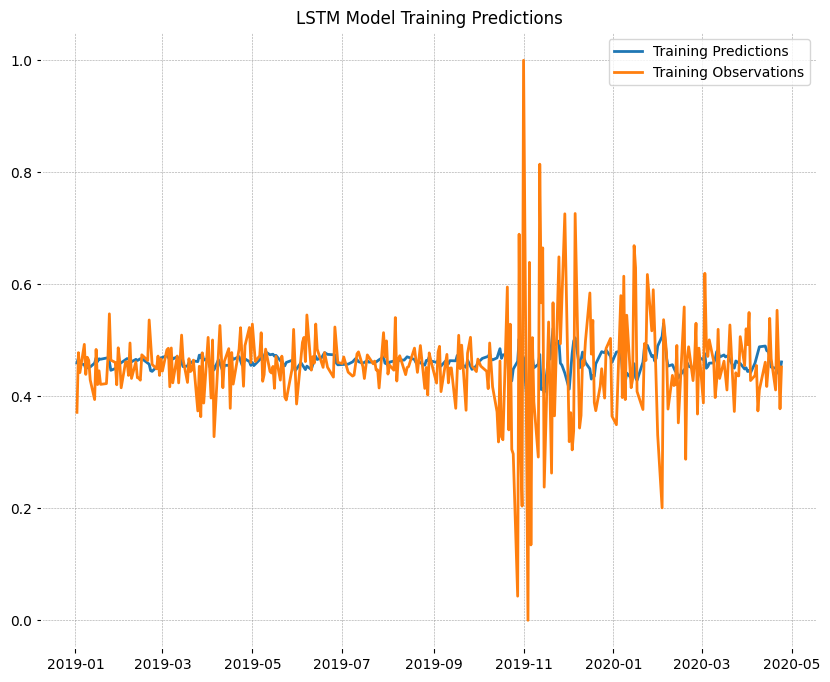

LSTM Training Performance:
MSE: 0.007295988034456968
RMSE: 0.08541655540466309
MAE: 0.05325876921415329



In [70]:
# Predicting for training data without inverse transforming
train_predictions_ret = model_r.predict(X_r_train).flatten()

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_ret)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('LSTM Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_ret, "LSTM Training")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


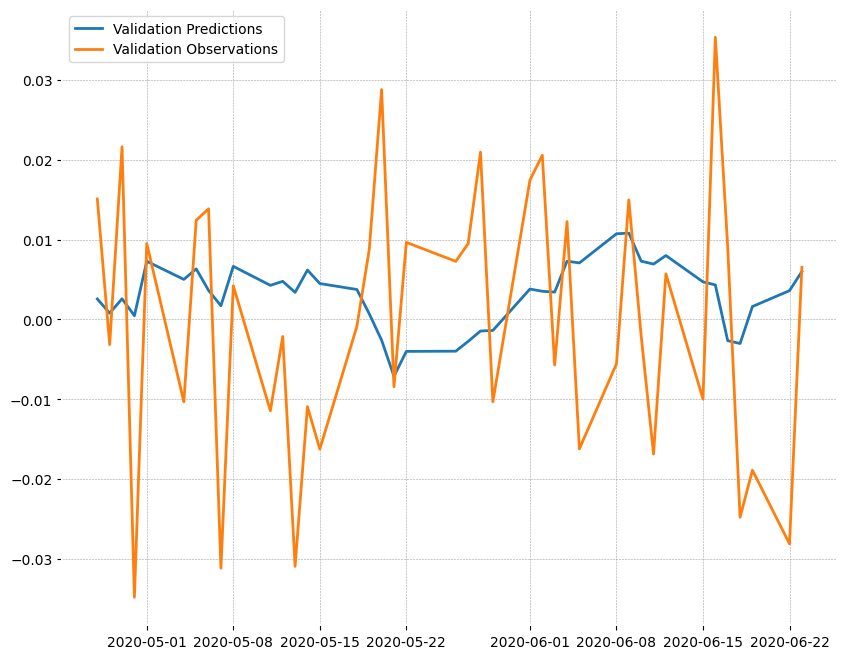

LSTM Validation Performance:
MSE: 0.00031284468976300404
RMSE: 0.01768741614151157
MAE: 0.01473340200232151



In [71]:
# Predicting and inverse transforming for validation data
val_predictions_ret = model_r.predict(X_r_val).flatten()
val_predictions_inv_ret = inverse_transform_predictions(val_predictions_ret, df_scaled_ret, scaler_ret)
y_val_inv_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_ret)
plt.plot(dates_r_val, y_val_inv_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_val_inv_ret, val_predictions_inv_ret, "LSTM Validation")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step 


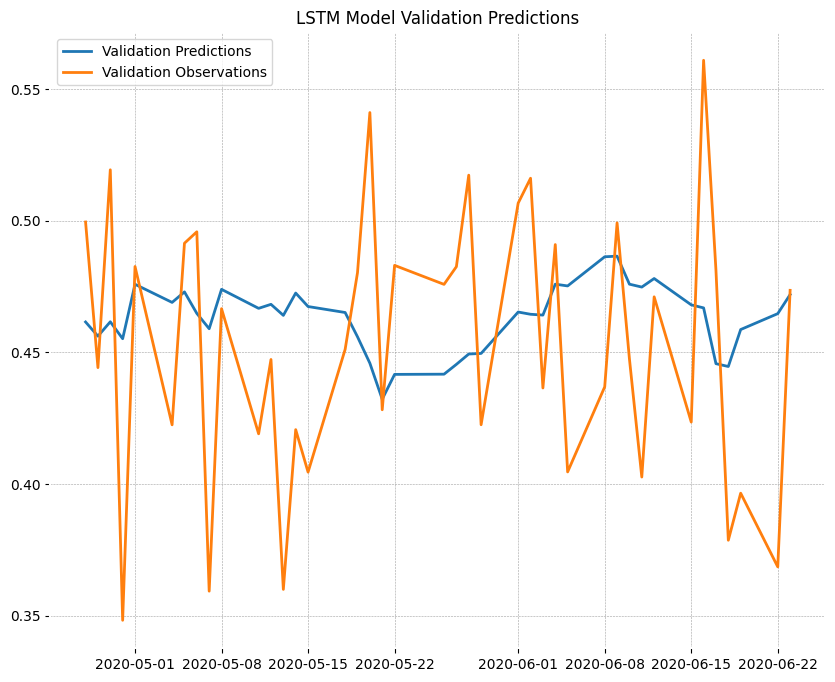

LSTM Validation Performance:
MSE: 0.0028767092153429985
RMSE: 0.05363496392965317
MAE: 0.04467726871371269



In [72]:
# Predicting for validation data without inverse transforming
val_predictions_ret = model_r.predict(X_r_val).flatten()

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_ret)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('LSTM Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_ret, "LSTM Validation")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


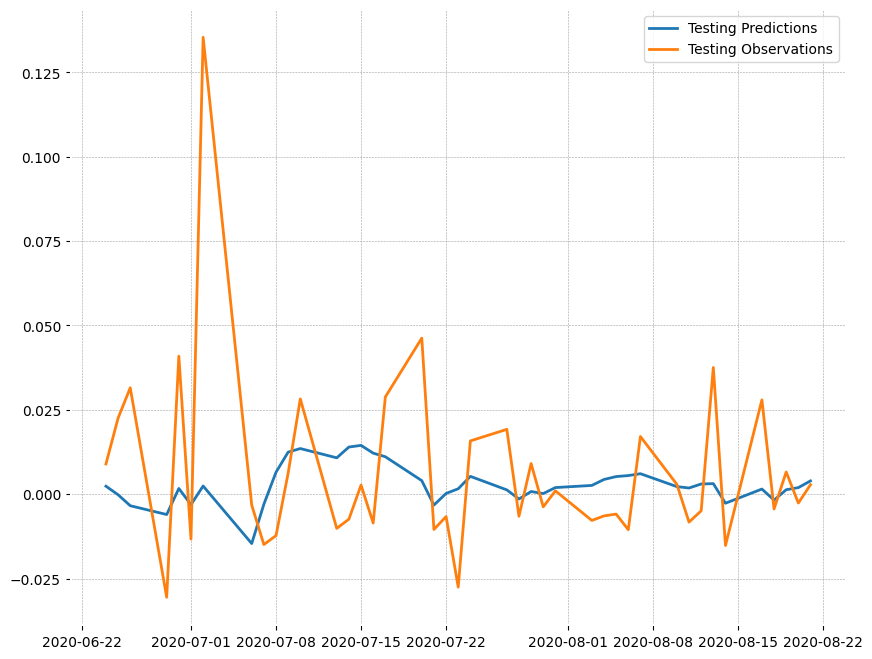

LSTM Testing Performance:
MSE: 0.0007292016014352365
RMSE: 0.0270037331018368
MAE: 0.017237207244978063



In [73]:
# Predicting and inverse transforming for testing data
test_predictions_ret = model_r.predict(X_r_test).flatten()
test_predictions_inv_ret = inverse_transform_predictions(test_predictions_ret, df_scaled_ret, scaler_ret)
y_test_inv_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_ret)
plt.plot(dates_r_test, y_test_inv_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_test_inv_ret, test_predictions_inv_ret, "LSTM Testing")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 


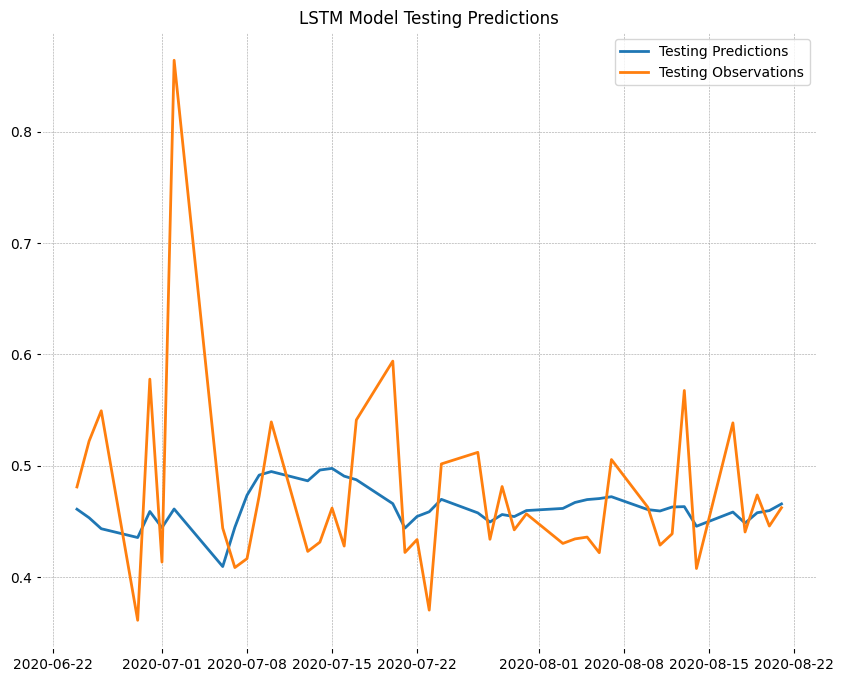

LSTM Testing Performance:
MSE: 0.0067052473314106464
RMSE: 0.08188557624816895
MAE: 0.05226976051926613



In [74]:
# Predicting for testing data without inverse transforming
test_predictions_ret = model_r.predict(X_r_test).flatten()

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_ret)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.title('LSTM Model Testing Predictions')
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_r_test, test_predictions_ret, "LSTM Testing")


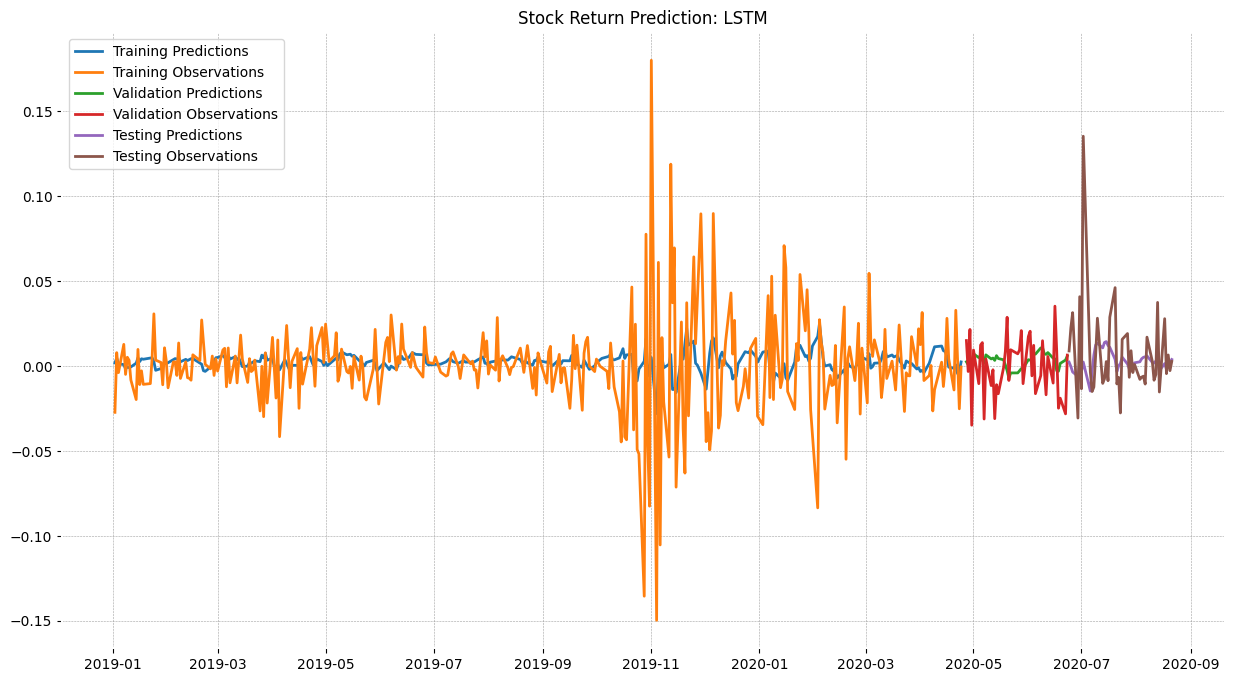

In [75]:
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.title('Stock Return Prediction: LSTM')
plt.legend()
plt.show()


## SVR Prediction

In [76]:
# Combine train and validation sets for hyperparameter tuning
X_r_train_val = np.concatenate((X_r_train, X_r_val))
y_r_train_val = np.concatenate((y_r_train, y_r_val))

# Reshape for GridSearchCV
X_r_train_val_flat = X_r_train_val.reshape(X_r_train_val.shape[0], -1)
X_r_test_flat = X_r_test.reshape(X_r_test.shape[0], -1)

In [77]:
from sklearn.svm import SVR
# Define the SVR model
svr = SVR()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_r_train_val_flat, y_r_train_val)

# Print the best parameters
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Train the SVR model using the best parameters
best_svr = grid_search.best_estimator_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}


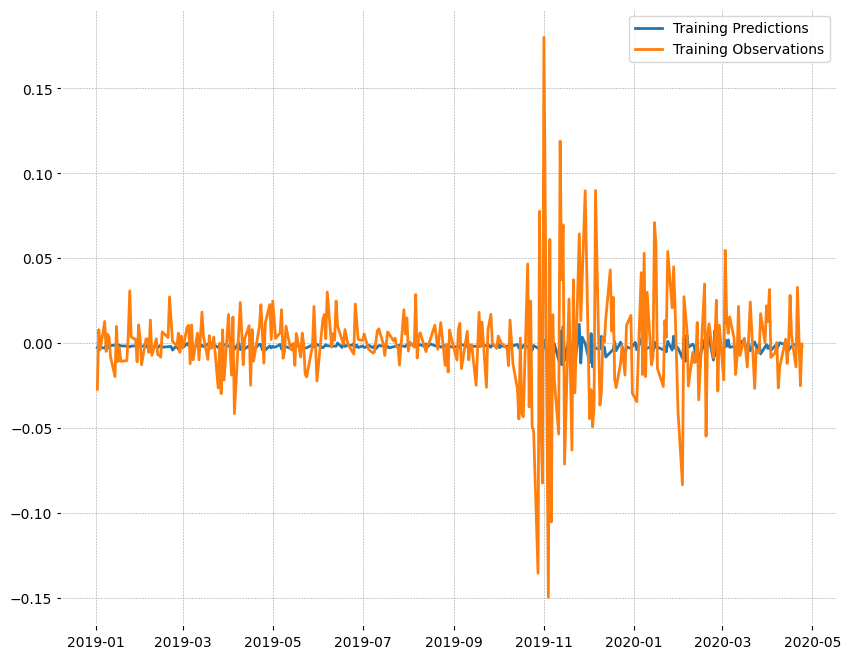

SVR Training Performance:
MSE: 0.0007738612104423461
RMSE: 0.02781836103084339
MAE: 0.017489741568895642



In [78]:
# Predicting and inverse transforming for training data
train_predictions_svr_ret = best_svr.predict(X_r_train.reshape(X_r_train.shape[0], -1))
train_predictions_inv_svr_ret = inverse_transform_predictions(train_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_train_inv_svr_ret = inverse_transform_predictions(y_r_train, df_scaled_ret, scaler_ret)

# Plotting training data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_inv_svr_ret)
plt.plot(dates_r_train, y_train_inv_svr_ret)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

# Calculate performance values for training data
evaluate_performance(y_train_inv_svr_ret, train_predictions_inv_svr_ret, "SVR Training")

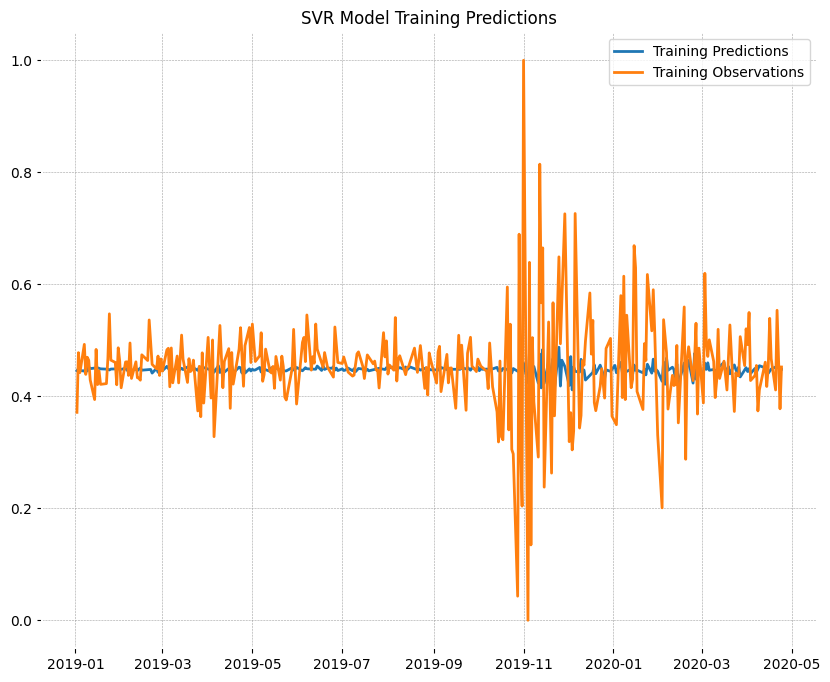

SVR Training Performance:
MSE: 0.007115906847158955
RMSE: 0.08435583469540774
MAE: 0.05303553818340937



In [79]:
# Predicting for training data without inverse transforming
train_predictions_svr_ret = best_svr.predict(X_r_train.reshape(X_r_train.shape[0], -1))

# Plotting training data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_train, train_predictions_svr_ret)
plt.plot(dates_r_train, y_r_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.title('SVR Model Training Predictions')
plt.show()

# Calculate performance values for training data using scaled values
evaluate_performance(y_r_train, train_predictions_svr_ret, "SVR Training")


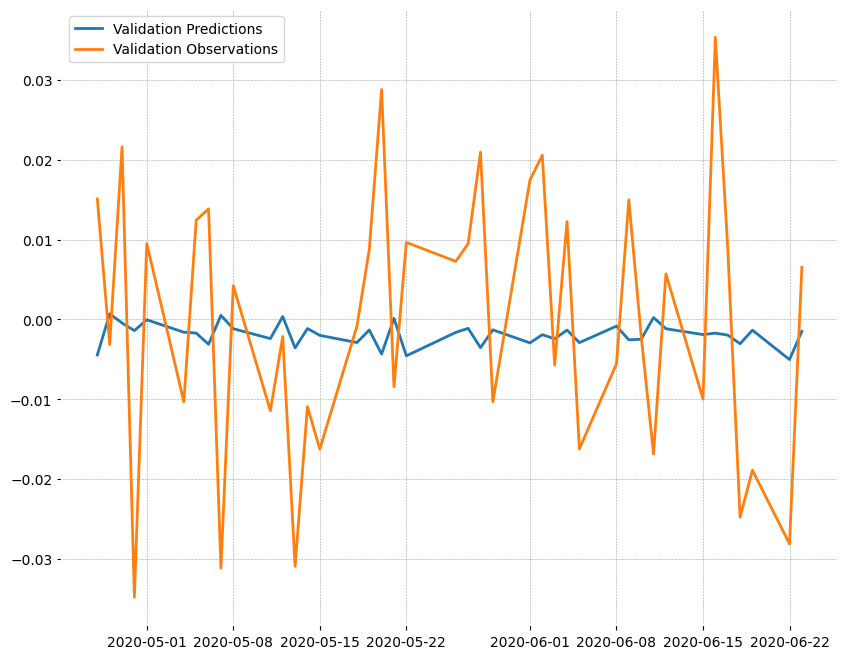

SVR Validation Performance:
MSE: 0.00029405272959033606
RMSE: 0.017147965756623612
MAE: 0.014512977856453379



In [80]:
# Validation predictions and evaluation
val_predictions_svr_ret = best_svr.predict(X_r_val.flatten().reshape(X_r_val.shape[0], -1))
val_predictions_inv_svr_ret = inverse_transform_predictions(val_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_val_inv_svr_ret = inverse_transform_predictions(y_r_val, df_scaled_ret, scaler_ret)

# Plotting validation data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_inv_svr_ret)
plt.plot(dates_r_val, y_val_inv_svr_ret)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

# Calculate performance values for validation data
evaluate_performance(y_val_inv_svr_ret, val_predictions_inv_svr_ret, "SVR Validation")

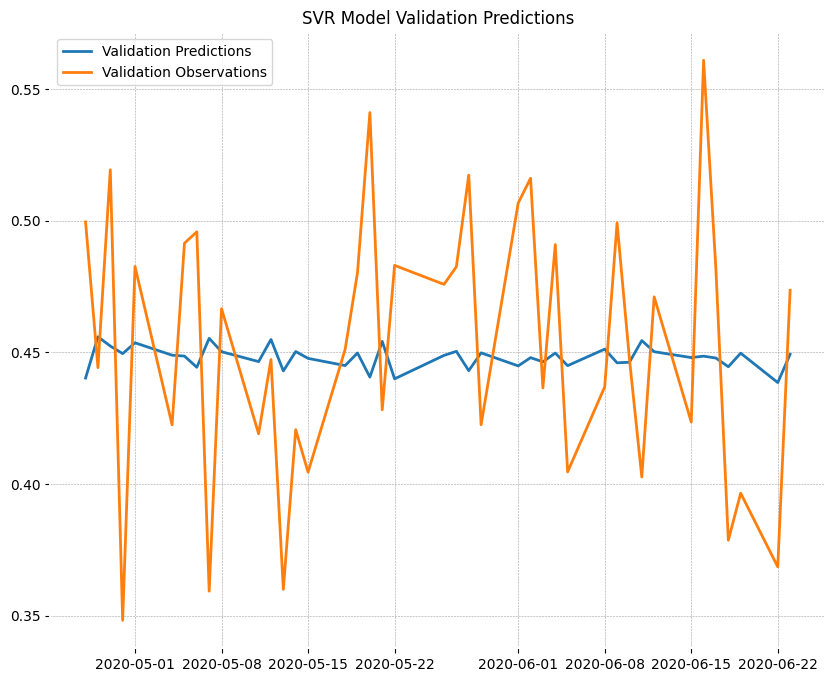

SVR Validation Performance:
MSE: 0.002703910990346174
RMSE: 0.05199914413090059
MAE: 0.044008860178344496



In [81]:
# Validation predictions and evaluation without inverse transforming
val_predictions_svr_ret = best_svr.predict(X_r_val.flatten().reshape(X_r_val.shape[0], -1))

# Plotting validation data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_val, val_predictions_svr_ret)
plt.plot(dates_r_val, y_r_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.title('SVR Model Validation Predictions')
plt.show()

# Calculate performance values for validation data using scaled values
evaluate_performance(y_r_val, val_predictions_svr_ret, "SVR Validation")

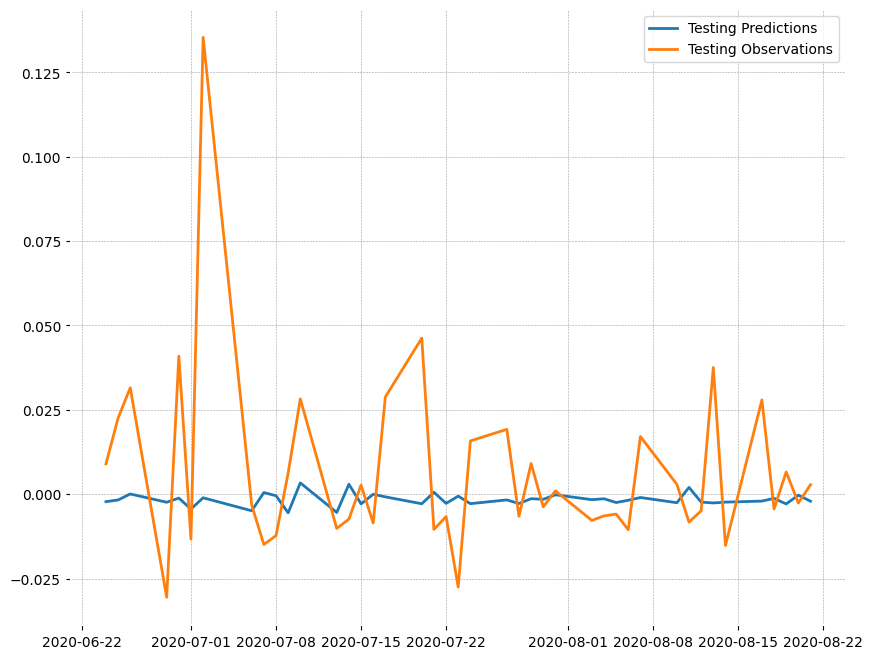

SVR Test Performance:
MSE: 0.000781602586108794
RMSE: 0.027957156259333565
MAE: 0.017084701247180405



In [82]:
# Test predictions and evaluation
test_predictions_svr_ret = best_svr.predict((X_r_test.flatten().reshape(X_r_test.shape[0], -1)))
test_predictions_inv_svr_ret = inverse_transform_predictions(test_predictions_svr_ret, df_scaled_ret, scaler_ret)
y_test_inv_svr_ret = inverse_transform_predictions(y_r_test, df_scaled_ret, scaler_ret)

# Plotting test data
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_inv_svr_ret)
plt.plot(dates_r_test, y_test_inv_svr_ret)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

# Calculate performance values for test data
evaluate_performance(y_test_inv_svr_ret, test_predictions_inv_svr_ret, "SVR Test")

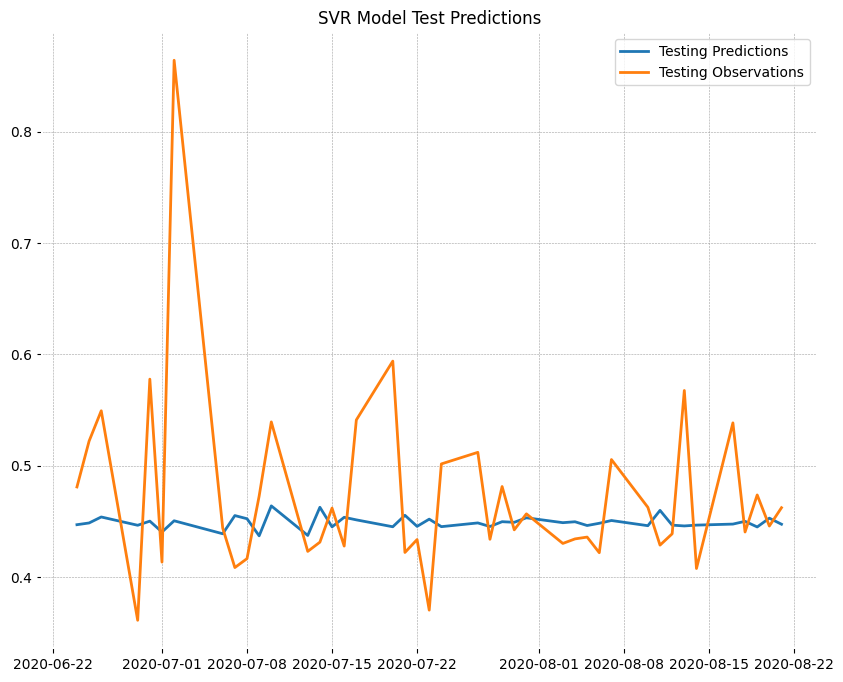

SVR Test Performance:
MSE: 0.007187091327486917
RMSE: 0.08477671453581412
MAE: 0.05180730211350928



In [83]:
# Test predictions and evaluation without inverse transforming
test_predictions_svr_ret = best_svr.predict(X_r_test.flatten().reshape(X_r_test.shape[0], -1))

# Plotting testing data directly using scaled values
plt.figure(figsize=(10, 8))
plt.plot(dates_r_test, test_predictions_svr_ret)
plt.plot(dates_r_test, y_r_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.title('SVR Model Test Predictions')
plt.show()

# Calculate performance values for testing data using scaled values
evaluate_performance(y_r_test, test_predictions_svr_ret, "SVR Test")

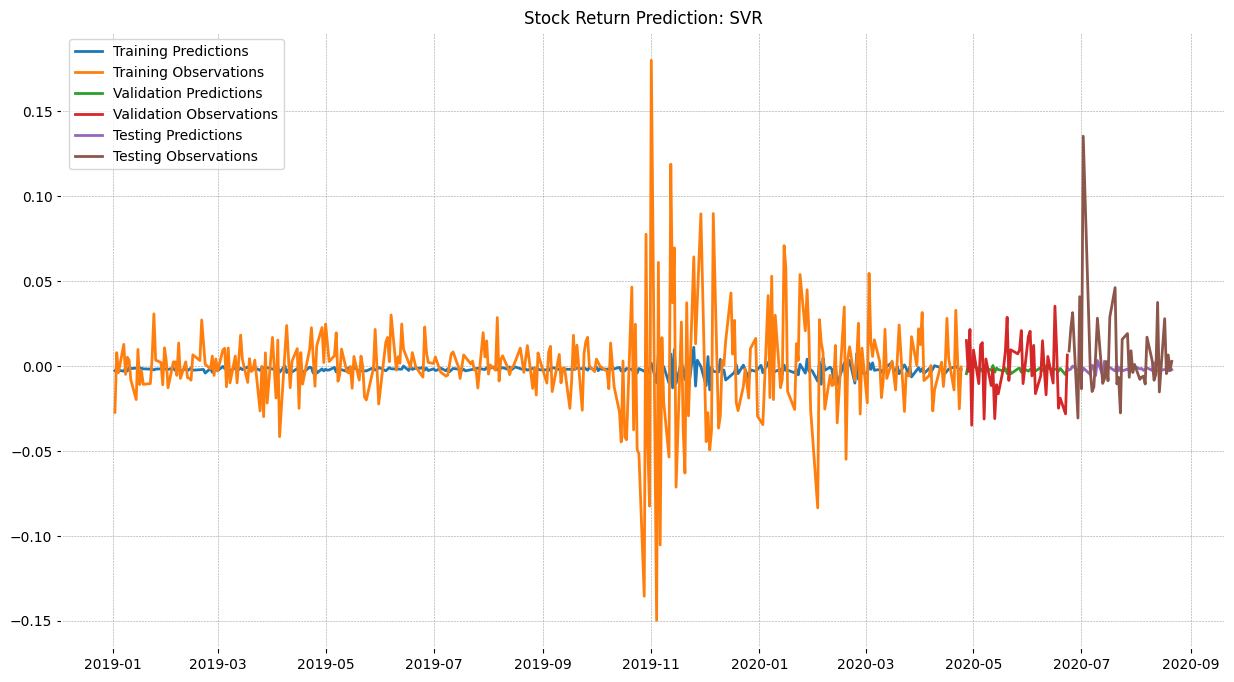

In [84]:
# Plotting all predictions and observations
plt.figure(figsize=(15, 8))
plt.plot(dates_r_train, train_predictions_inv_svr_ret, label='Training Predictions')
plt.plot(dates_r_train, y_train_inv_svr_ret, label='Training Observations')
plt.plot(dates_r_val, val_predictions_inv_svr_ret, label='Validation Predictions')
plt.plot(dates_r_val, y_val_inv_svr_ret, label='Validation Observations')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='Testing Predictions')
plt.plot(dates_r_test, y_test_inv_svr_ret, label='Testing Observations')
plt.title('Stock Return Prediction: SVR')
plt.legend()
plt.show()

## Summary Comparision

ARIMA Performance:
MSE: 0.0007658357383330583
RMSE: 0.027673737339453417
MAE: 0.016926969276090047

SVR Performance:
MSE: 0.000781602586108794
RMSE: 0.027957156259333565
MAE: 0.017084701247180405

LSTM Performance:
MSE: 0.0007292016014352365
RMSE: 0.0270037331018368
MAE: 0.017237207244978063



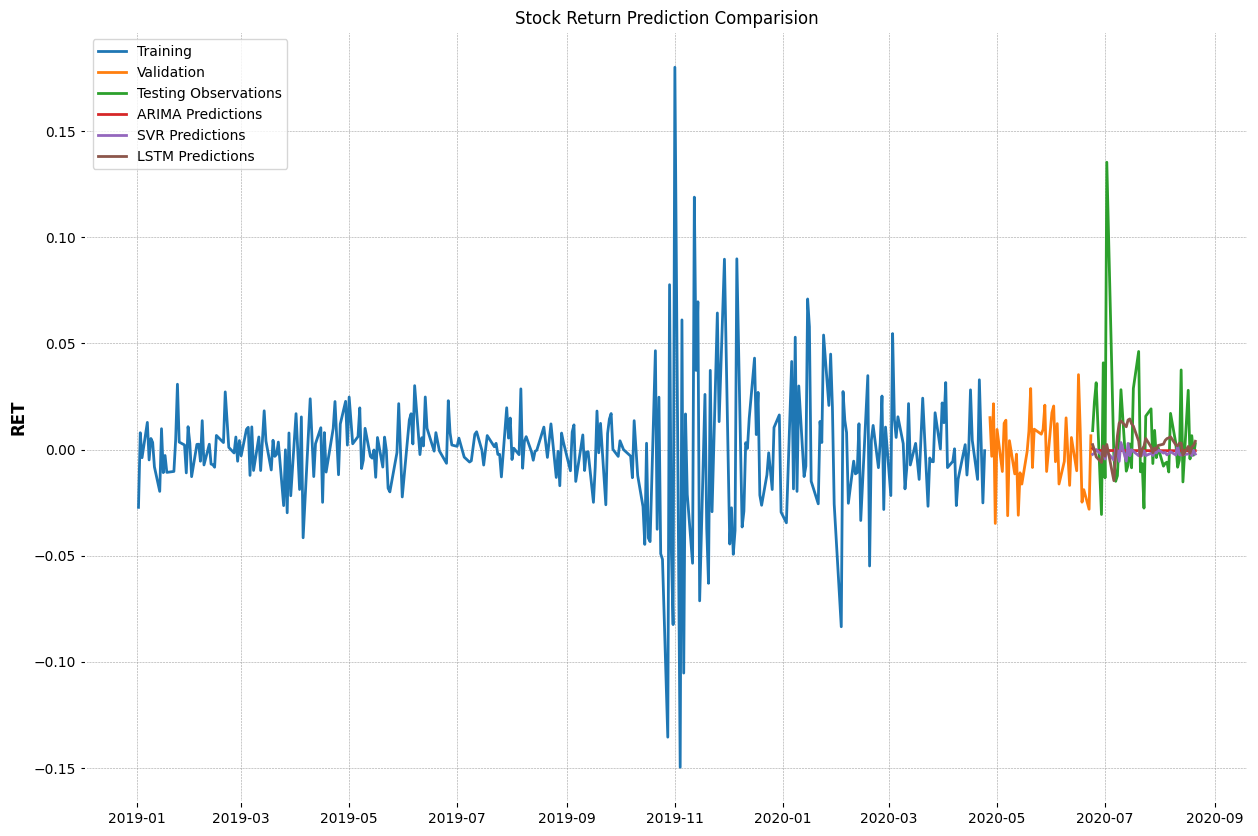

In [85]:
evaluate_performance(y_test_inv_arima_ret, test_predictions_inv_arima_ret, "ARIMA")
evaluate_performance(y_test_inv_svr_ret, test_predictions_inv_svr_ret, "SVR")
evaluate_performance(y_test_inv_ret, test_predictions_inv_ret, "LSTM")


plt.figure(figsize=(15, 10))
plt.plot(dates_r_train, y_train_inv_ret, label='Training')
plt.plot(dates_r_val, y_val_inv_ret, label='Validation')
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='ARIMA Predictions')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='SVR Predictions')
plt.plot(dates_r_test, test_predictions_inv_ret, label='LSTM Predictions')


plt.title('Stock Return Prediction Comparision')
plt.legend()
plt.ylabel('RET')
plt.show()

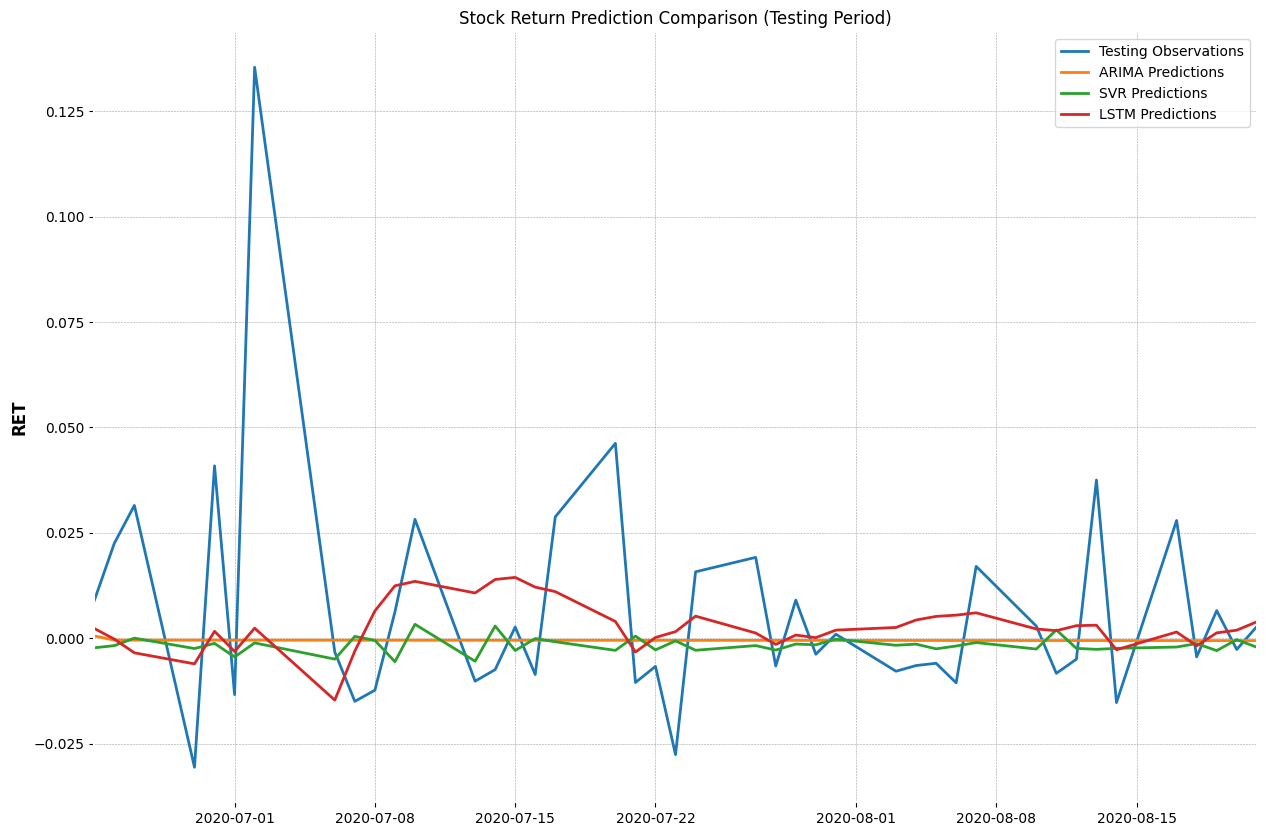

In [86]:
# Plot the predictions focusing on the testing period
plt.figure(figsize=(15, 10))
plt.plot(dates_r_test, y_test_inv_ret, label='Testing Observations')
plt.plot(dates_r_test, test_predictions_inv_arima_ret, label='ARIMA Predictions')
plt.plot(dates_r_test, test_predictions_inv_svr_ret, label='SVR Predictions')
plt.plot(dates_r_test, test_predictions_inv_ret, label='LSTM Predictions')

plt.title('Stock Return Prediction Comparison (Testing Period)')
plt.legend()
plt.ylabel('RET')

# Set x-axis limits to focus on the testing period
plt.xlim(dates_test[0], dates_test[-1])

plt.show()